Autumn 2021 - Social Graphs and Interactions (02805) - DTU

# Harry Potter and the Graph of Secrets - Final Project

## Table of Contents

* [1. Motivation](#c1)

* [2. Basic Statistics](#c2)
    * [2.1 Data Preparation](#s3_1)
    * [2.2 Data and Basic Statistics](#s3_2)
    * [2.3 Visualization](#s3_3)
* [3. Tools, theory and analysis](#c3)
    * [3.1 Project 1: WordCloud analysis of houses](#s3_1)
    * [3.2 Project 2:...](#s3_2)
    * [3.3 Project 3: Sentiment Analysis](#s3_3)
    * [3.4 Project 4:...](#s3_4)
    * [3.5 Project 5:...](#s3_5)
    * [3.6 Project 6:...](#s3_6)

* [4. Discussion](#c4)

* [5. Contributions](#c5)

* [6. References](#c6)

## 1. Motivation  <a class="anchor" id="c1"></a>

Choosing the main topic for our final project was not easy, as the internet is full of fandoms and there are millions of pages we could have turned to. But all three members of this wonderful team felt the same when we thought of Harry Potter. We reminisce about those fantasy films we grew up with and dreamt about so many times. All of us agreed that Harry Potter had influenced our childhood and adolescence in a way that was as special as few other book and film sagas.

This project makes it clear that motivation towards a task completely changes the perspective with which the task is approached. In our case, and from the first day we decided to tackle this topic, we felt the magic of the Harry Potter world welling up inside us and turned us into frenzied fans of the magical world at the mercy of networks and graphs. The opportunity we had before us to venture into the secrets of the connection between characters, between the houses of Hogwarts, or even the development of the feelings of the most important characters throughout the saga... Simply thrilling!

Our most arduous task is to lead the audience, namely you, along this path in which enormous amounts of information are revealed and to keep the mystery and excitement of further reading. We have tried to make this adventurous journey through data analysis that combines the world of knowledge with the magic of JKRowling's pen as bearable as possible. So, without further ado, welcome to Harry Potter and the Graph of Secrets.

## 2. Basic Statistics <a class="anchor" id="c2"></a>

The data used and needed for the analysis has been extracted and prepared for this project, and it is detailed below:
> * XXX Dataset:
> * Harry Potter Scripts:

### 2.1 Data Preparation <a class="anchor" id="s_2_1"></a>

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import math
import re 
import urllib.request
import json
import matplotlib.pyplot as plt
import nltk
from nltk import * 
from nltk.corpus import * 
from nltk.tokenize import WordPunctTokenizer
import wordcloud
from IPython.display import YouTubeVideo, HTML, display
import pickle
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

First of all, we started with a study of the Harry Potter wiki page, looked at how we could extract information and brainstormed possible ideas for the scope of our final project. We decided to begin by extracting information on as many characters as possible and, to commence with, categorising them by their Hogwarts houses: 
> * Gryffindor
> * Ravenclaw
> * Hufflepuff
> * Slytherin
> * Unknown_House

Eventually, we added a fifth cathegory called _"Unknown_House"_ as some of the characters are not members of a house. The list of houses is then created so we can iterate on each house and extract each list of members.

In [2]:
list_of_cath =['Category:Unknown_House',
'Category:Ravenclaws',
'Category:Gryffindors',
'Category:Slytherins' ,
'Category:Hufflepuffs']

dict_house={}
for cat in list_of_cath:
    list_of_members=[]
    
    baseurl = "https://harrypotter.fandom.com/api.php?"
    action = "action=query"
    cmtitle = "cmtitle="+cat
    content = "list=categorymembers&cmlimit=max"
    dataformat ="format=json"
    
    query = "{}{}&{}&{}&{}".format(baseurl, action, content, cmtitle, dataformat)
    print(query)
    
    wikiresponse = urllib.request.urlopen(query)
    wikidata = wikiresponse.read()
    wikitext = wikidata.decode('utf-8')
    description = json.loads(wikitext)  
    for dict_ in description['query']['categorymembers']:
        if ('Template:' in dict_['title']) or ('Category:' in dict_['title']) \
        or ('Unidentified' in dict_['title']):
            pass
        else:
            list_of_members.append(dict_['title'])
    dict_house[cat]=list_of_members

https://harrypotter.fandom.com/api.php?action=query&list=categorymembers&cmlimit=max&cmtitle=Category:Unknown_House&format=json
https://harrypotter.fandom.com/api.php?action=query&list=categorymembers&cmlimit=max&cmtitle=Category:Ravenclaws&format=json
https://harrypotter.fandom.com/api.php?action=query&list=categorymembers&cmlimit=max&cmtitle=Category:Gryffindors&format=json
https://harrypotter.fandom.com/api.php?action=query&list=categorymembers&cmlimit=max&cmtitle=Category:Slytherins&format=json
https://harrypotter.fandom.com/api.php?action=query&list=categorymembers&cmlimit=max&cmtitle=Category:Hufflepuffs&format=json


Once the information has been exctracted, a dataframe is created linking each of the characters to their respective houses.

In [3]:
all_house =[]
for col in sorted(list_of_cath): 
    df = pd.DataFrame(dict_house[col])
    df['House']=col[9:]
    df.columns=['Name','House']
    all_house.append(df)
df = pd.concat(all_house).reset_index(drop=True)
df

Name          House
0              Euan Abercrombie    Gryffindors
1                  Sakura Akagi    Gryffindors
2                   Zakir Akram    Gryffindors
3                     Nick Alas    Gryffindors
4               Filemina Alchin    Gryffindors
..                          ...            ...
862            Victoire Weasley  Unknown_House
863             Simon Wilkinson  Unknown_House
864  William (Hogwarts student)  Unknown_House
865             Winston's niece  Unknown_House
866               Eldred Worple  Unknown_House

[867 rows x 2 columns]

In order to proceed with the analysis, a file containing all the useful information extracted from the Harry Potter wiki is made. Then, all the files are stored in the folder `Description`, for a later use in the project.

In [4]:
for name in list(df.Name):
    baseurl = "https://harrypotter.fandom.com/api.php?"
    action = "action=query"
    title = "titles="+urllib.parse.quote_plus(name)
    content = "prop=revisions&rvprop=content&rvslots=*"
    dataformat ="format=json"
    
    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)

    wikiresponse = urllib.request.urlopen(query)
    wikidata = wikiresponse.read()
    wikitext = wikidata.decode('utf-8')
    description = json.loads(wikitext)  
    page_number=list(description['query']['pages'].keys())[0]
    text_to_paste= description['query']['pages'][page_number]['revisions'][0]['slots']['main']['*']
    
    #SECOND STEP: SAVE RESULT IN A FOLDER
   # with open("Description\{}.txt".format(name), "w") as text_file:
   #     json.dump(text_to_paste,text_file)
   # print(name)

Similarly to the previous step, a new folder is created named `Description_extract` where the files of all the characters are created and stored, these containing the descriptive text for each of them. In order to achieve that and get the "clean" version of each character description, we had to carefully analyse, detect  and eliminate each of the patterns effectively. When dealing with this task we encountered a huge amount of different patterns we had to look for and carefully remove to leave the relevant information intact for us. These are some examples:

* `==\n\n\n=== Family lineage ===\n \t \t`
* `\n\n\n===== History of Magic =====\n\n \t`
* `Dumbledore\u2019s`
* `n\n\n==== Harry's \"death\" ====\n`
* `\n\n\n=== Career as an Auror (2007\u20132016) ===\n\n`

...and much more.

As it can be seen, there was much to take into consideration when dealing with the cleaning of the text, not only with different forms of holding the text but also unicode and special characters. The final version of the main patterns used can be seen below:

```python
pattern_1 ='(=+[\w\s\–\(\)\'^\w\/\"\,\.\w\-\w]+=+)'
pattern_2 ='(=+(?:[\w\s]+=+\s)+[\w\s]+=+)'
```


In [5]:
for name in list(df.Name):
    baseurl = "https://harrypotter.fandom.com/api.php?"
    action = "action=query"
    title = f"titles="+urllib.parse.quote_plus(name)
    content = "prop=extracts&exlimit=1&explaintext"
    dataformat ="format=json"
    
    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
    
    wikiresponse = urllib.request.urlopen(query)
    wikidata = wikiresponse.read()
    wikitext = wikidata.decode('utf-8')
    description = json.loads(wikitext)
    page_number = list(description['query']['pages'].keys())[0]
    text_to_paste=description['query']['pages'][page_number]['extract']
    list_to_remove=["== Notes and references ==","== External links ==",'\n','\t']
    
    #FIRST STEP FIND TITLE WITH REG EXPRESS
    pattern_1 ='(=+[\w\s\–\(\)\'^\w\/\"\,\.\w\-\w]+=+)'
    pattern_2 ='(=+(?:[\w\s]+=+\s)+[\w\s]+=+)'
    list_to_remove = re.findall(pattern_1,text_to_paste)+re.findall(pattern_2,text_to_paste)
    list_to_remove.append('\t')
    list_to_remove.append('\n')
    for element in list_to_remove:
        text_to_paste=text_to_paste.replace(element,"")
    
    pattern_replace = '(\s\s+)'
    list_to_replace = re.findall(pattern_replace,text_to_paste)
    for element in list_to_replace:
        text_to_paste=text_to_paste.replace(element," ")
        
    # Here we are just removing the unicode characters from the text
    text_to_paste = text_to_paste.encode('unicode_escape').decode('ascii')
    text_to_paste = re.sub(r'\\u(.){4}', '', text_to_paste)
    
    #SECOND STEP: SAVE RESULT IN A FOLDER
   # with open("Description_extract\{}.txt".format(name), "w") as text_file:
   #      json.dump(text_to_paste,text_file)
   # print(name)

In order to cleanorganisational characters that leaked through and only keep relevant characters, we clean or df as following:

In [6]:
page_path = "Description/"

list_to_remove=[]
list_to_keep=[]
for name in df.Name:

    with open(page_path+name+'.txt','r') as f:
        node_description= f.read()
    node_description
    pattern_to_erase=r'(Organisation infobox)'
    pattern_to_keep=r'(Individual infobox)'
    if len(re.findall(pattern_to_erase,node_description))>0:
        list_to_remove.append(name)
    if len(re.findall(pattern_to_keep,node_description))>0:
        list_to_keep.append(name)

df = df[df['Name'].isin(list_to_keep)]

The function `find_cat` is created in order to detect in an easy and effective way the category.

In [7]:
def find_cat(wikitext,reg):
    value = re.findall(reg, wikitext)
    if len(value) > 0:
        return value[0]
    else:
        return "Unknown"

From each of the files for each Harry Potter character that we have saved in the folder `Description`, we still have plenty of information to gather like gender, blood type (considering if it is a descendant from a muggle family or not), nationality, height, weight, and much more. To do that, the function `get_all_attributs` is created below.


In [8]:
def get_all_attributs(name,page_path = "Description/"):
    with open(page_path+name+'.txt','r') as f:
        node_description= f.read()

    #gender
    reg_gender = r"gender = ([\w \-]+)"
    item= re.findall(reg_gender,node_description)
    if len(item)>0:
        gender=item[0]
    else:
        gender='Unknown'
    
    #blood
    reg_blood = r"blood = \[\[([\w\- ]+)\]\]"
    item= re.findall(reg_blood,node_description)
    if len(item)>0:
        blood=item[0]
    else:
        blood='Unknown'
    
    #species
    reg_species= r"species = \[\[([\w \-]+)\]\]"
    item = re.findall(reg_species,node_description)
    if len(item)>0:
        species=item[0]
    else:
        species='Unknown'
    
    #nationality
    reg_nationality_1=r"nationality = \[\[([\w\| \-]+)\]\]"
    reg_nationality_1_bis=r'nationality = \[\[(.*?)(?:\|.*?)?\]\]'
    reg_nationality_2=r"nationality = \{\{([\w\| \-]+)\}\}"

    item= re.findall(reg_nationality_1_bis,node_description)+ re.findall(reg_nationality_2,node_description)  
    if len(item)>0:
        nationality=item[0]
    else:
        nationality='Unknown'
    
    #heigh
    reg_height= r"height = ([\w\s\-\']+)"
    item = re.findall(reg_height,node_description)
    if len(item)>0:
        heigh=item[0]
    else:
        heigh='Unknown'    
    
    #weight
    reg_weight=r"weight = ([\w\s\-]+)"
    item = re.findall(reg_weight,node_description)
    if len(item)>0:
        weight=item[0]
    else:
        weight='Unknown'
        
    #hair
    reg_hair=r"hair = ([\w \-]+)"
    item =re.findall(reg_hair,node_description)
    if len(item)>0:
        hair=item[0]
    else:
        hair='Unknown'
        
    #eyes
    reg_eyes=r"eyes = ([\w \-]+)"
    item =re.findall(reg_eyes,node_description)
    if len(item)>0:
        eyes=item[0]
    else:
        eyes='Unknown'
        
    #skin    
    reg_skin=r"skin = ([\w \-]+)"
    item =re.findall(reg_skin,node_description)
    if len(item)>0:
        skin=item[0]
    else:
        skin='Unknown'
        
    #caracters_in_page
    new_reg_link = r'\[\[(.*?)(?:\|.*?)?\]\]'
    caracters_in_page=[]
    linked_names_quick= re.findall(new_reg_link,node_description)
    for element in set(linked_names_quick):
        if element in list(df.Name):
            caracters_in_page.append(element)
    return [gender,blood,species,nationality,heigh,weight,hair,eyes,skin,caracters_in_page]

As an example, here are the attributes we obtain from the Ronald Weasley file:

In [9]:
get_all_attributs('Ronald Weasley')

['Male',
 'Pure-blood',
 'Human',
 'England',
 "5' 9",
 '152 lbs',
 'Red',
 'Blue',
 'Pale',
 ['Arthur Weasley',
  'Seamus Finnigan',
  'Terry Boot',
  'Luna Lovegood',
  'George Weasley',
  'Fred Weasley',
  'James Potter II',
  'Hermione Granger',
  'Anthony Goldstein',
  'Minerva McGonagall',
  'Ginevra Weasley',
  'Romilda Vane',
  'Zacharias Smith',
  'Elphias Doge',
  'Parvati Patil',
  'Dolores Umbridge',
  'Cedrella Black',
  'Alicia Spinnet',
  'Charles Weasley',
  'Dean Thomas',
  'Cho Chang',
  'Gregory Goyle',
  'Hannah Abbott',
  'Molly Weasley',
  'Lee Jordan',
  'Angelina Johnson',
  'Peter Pettigrew',
  'Nicholas de Mimsy-Porpington',
  'Michael Corner',
  'James Potter I',
  'Bellatrix Lestrange',
  'Severus Snape',
  'Kingsley Shacklebolt',
  'Gilderoy Lockhart',
  'Rubeus Hagrid',
  'Aberforth Dumbledore',
  'Oliver Wood',
  'Cedric Diggory',
  'Mundungus Fletcher',
  'Quirinus Quirrell',
  'Garrick Ollivander',
  'Amycus Carrow',
  'Vincent Crabbe',
  'Myrtle Warren

Finally, we use the `get_all_atributs` function to, in fact, get all the attributes of the characters and practically store add them as new columns of information in the dataframe so we are able to sort and use the relevant information we filtered.

In [10]:
gender_link=[]
blood_link=[]
species_link=[]
nationality_link=[]
heigh_link=[]
weight_link=[]
hair_link=[]
eyes_link=[]
skin_link=[]
caracters_in_page_link=[]

for name in list(df['Name']):
    attribut = get_all_attributs(name)
    gender_link.append(attribut[0])
    blood_link.append(attribut[1])
    species_link.append(attribut[2])
    nationality_link.append(attribut[3])
    heigh_link.append(attribut[4])
    weight_link.append(attribut[5])
    hair_link.append(attribut[6])
    eyes_link.append(attribut[7])
    skin_link.append(attribut[8])
    caracters_in_page_link.append(attribut[9])
        
df['Gender']=gender_link
df['Blood']=blood_link
df['Species']=species_link
df['Nationality']=nationality_link
df['Heigh']=heigh_link
df['Weight']=weight_link
df['Hair']=hair_link
df['Eyes']=eyes_link
df['Skin']=skin_link
df['Caracters_in_page']=caracters_in_page_link
df['House'].replace('Unknown_House', 'Unknown')
df.describe()

<ipython-input-10-f436883cfeee>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender']=gender_link
<ipython-input-10-f436883cfeee>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Blood']=blood_link
<ipython-input-10-f436883cfeee>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

Name        House Gender    Blood Species Nationality    Heigh  \
count          856          856    856      856     856         856      856   
unique         856            5      3        4       4           7       15   
top     Tom Riddle  Gryffindors   Male  Unknown   Human      GBorIE  Unknown   
freq             1          227    471      656     834         777      838   

         Weight     Hair     Eyes     Skin Caracters_in_page  
count       856      856      856      856               856  
unique       13       36       26       18               477  
top     Unknown  Unknown  Unknown  Unknown                []  
freq        843      610      695      619               320

As this process we just went through is quite tedious but specially time consuming, we store the final dataset so that we do not have to re-run the code each time we open the notebook again and again. This way, we just create the file `pickle_network_prep.txt`, store it, and just load it when we go back to the code!

In [11]:
import pickle

# For storing

with open(r"pickle_network_prep.txt", "wb") as fp:   #Pickling
    pickle.dump(df, fp)

# For loading

with open(r"pickle_network_prep.txt", "rb") as fp:   # Unpickling
    df_all = pickle.load(fp)

df_all.describe()

Name        House Gender    Blood Species Nationality    Heigh  \
count          856          856    856      856     856         856      856   
unique         856            5      3        4       4           7       15   
top     Tom Riddle  Gryffindors   Male  Unknown   Human      GBorIE  Unknown   
freq             1          227    471      656     834         777      838   

         Weight     Hair     Eyes     Skin Caracters_in_page  
count       856      856      856      856               856  
unique       13       36       26       18               477  
top     Unknown  Unknown  Unknown  Unknown                []  
freq        843      610      695      619               320

It is time to create generate our first gfraph of this network. Each node will have several features, all related with the character it corresponds to.

In [12]:
G = nx.DiGraph()
for index, row in df_all.iterrows():
    G.add_node(row['Name'], House=row['House'], Gender=row['Gender'],Blood=row['Blood'],Species=row['Species'] \
                          , Nationality=row['Nationality'], Heigh=row['Heigh'],Weight=row['Weight'],Eyes=row['Eyes'] \
                          ,Skin=row['Skin'])
for index, row in df_all.iterrows():
    for element in row['Caracters_in_page']:
        #REMOVE SELF LOOP
        if element !=row['Name']:
            G.add_edge(row['Name'],element)

Now that we have generated the graph `G`, we want to remove those nodes with a degree equal to zero as they are not relevant for our analysis (_a total of 315 nodes_). After removing those nodes from our graph, we proceed to remove the characters as well from our Dataframe. Therefore, we are left with just the characters that matter for our study.

In [13]:
#Nodes with zero degree
remove = [node for node,degree in dict(G.degree()).items() if degree==0]

print('nb nodes to remove',len(remove))

#Remove those nodes from the graph

G.remove_nodes_from(remove)

#Remove thoses nodes from the Dataframe
df_all.drop(df_all[df_all.Name.isin(remove)].index,inplace=True)

nb nodes to remove 315


In this part, as we did during the exercices at class, we decided to consider only the GCC of the graph G. We also reduce the DataBase created with only the names of the characters in the GCC.

In [14]:
largest_cc = max(nx.weakly_connected_components(G), key=len)
GCC = G.subgraph(largest_cc)

# Creation of the dataframe that will contain only the GCC.
mask = df_all.Name.apply(lambda x: any(item for item in list(GCC.nodes()) if item in x))
df = df_all[mask]

### 2.2 Data and Basic Statistics <a class="anchor" id="s_2_2"></a>

We start by looking at the size of the network we are dealing with:

In [15]:
print(f"Number of nodes in the network: {len(list(GCC.nodes))}" )
print(f"Number of links in the network: {len(list(GCC.edges))}" )

Number of nodes in the network: 500
Number of links in the network: 5240


The most connected characters are detailed below, from an in, out and all degree perspective. The names shown were expected as they are some of the most famous characters.

In [16]:
degrees_in = np.array([GCC.in_degree(n) for n in GCC.nodes()])
degrees_out = np.array([GCC.out_degree(n) for n in GCC.nodes()])
all_degree = np.array([GCC.degree(n) for n in GCC.nodes()])

df_degree= df.copy()
df_degree['in_degree']=degrees_in
df_degree['out_degree']=degrees_out
df_degree['all_degree']=all_degree

print('Top connected characters in Harry Potter by all degrees')
print(df_degree.sort_values(by='all_degree',ascending=False)[['Name','all_degree']][:5])
print('______________________________________')
print('Top connected characters in Harry Potter by in degrees')
print(df_degree.sort_values(by='in_degree',ascending=False)[['Name','in_degree']][:5])
print('______________________________________')
print('Top connected characters in Harry Potter by out degrees')
print(df_degree.sort_values(by='out_degree',ascending=False)[['Name','out_degree']][:5])

Top connected characters in Harry Potter by all degrees
                 Name  all_degree
166      Harry Potter         357
52   Albus Dumbledore         215
668        Tom Riddle         211
221    Ronald Weasley         206
71   Hermione Granger         195
______________________________________
Top connected characters in Harry Potter by in degrees
                 Name  in_degree
166      Harry Potter        266
668        Tom Riddle        148
221    Ronald Weasley        124
52   Albus Dumbledore        124
71   Hermione Granger        120
______________________________________
Top connected characters in Harry Potter by out degrees
                 Name  out_degree
52   Albus Dumbledore          91
166      Harry Potter          91
221    Ronald Weasley          82
794   Jacob's sibling          80
71   Hermione Granger          75


Intriguing, but who are really the characters with most connections from each of the 4 houses of Hogwarts? We find the answer here:

* **Gryffindor**

In [17]:
df_house_degree=df_degree.loc[df_degree['House']=='Gryffindors']

print('Top connected characters in Gryffindor by out degrees')
print(df_house_degree.sort_values(by='all_degree',ascending=False)[['Name','all_degree']].head())

Top connected characters in Gryffindor by out degrees
                   Name  all_degree
166        Harry Potter         357
52     Albus Dumbledore         215
221      Ronald Weasley         206
71     Hermione Granger         195
126  Minerva McGonagall         170


* **Hufflepuff**

In [18]:
df_house_degree=df_degree.loc[df_degree['House']=='Hufflepuffs']

print('Top connected characters in Hufflepuff by out degrees')
print(df_house_degree.sort_values(by='all_degree',ascending=False)[['Name','all_degree']].head())

Top connected characters in Hufflepuff by out degrees
                 Name  all_degree
359  Nymphadora Tonks         105
256    Cedric Diggory          98
342     Pomona Sprout          68
231     Hannah Abbott          63
239       Susan Bones          63


* **Ravenclaw**

In [19]:
df_house_degree=df_degree.loc[df_degree['House']=='Ravenclaws']

print('Top connected characters in Ravenclaw by out degrees')
print(df_house_degree.sort_values(by='all_degree',ascending=False)[['Name','all_degree']].head())

Top connected characters in Ravenclaw by out degrees
                  Name  all_degree
461      Luna Lovegood         110
426    Filius Flitwick          86
460  Gilderoy Lockhart          71
401          Cho Chang          71
504   Sybill Trelawney          54


* **Slytherin**

In [20]:
df_house_degree=df_degree.loc[df_degree['House']=='Slytherins']

print('Top connected characters in Slytherin by out degrees')
print(df_house_degree.sort_values(by='all_degree',ascending=False)[['Name','all_degree']].head())

Top connected characters in Slytherin by out degrees
                 Name  all_degree
668        Tom Riddle         211
688     Severus Snape         186
622      Draco Malfoy         162
707  Dolores Umbridge         135
683   Horace Slughorn         116


Now that we have had an overview of the characters and their degrees, we now plot the degree disrtribution of the graph to get a better grasp and overview of the network we approach.

In [21]:
# Plot function for degree distributions
def plot_degree_dist(degs, title):
    k_min = np.min(degs)
    k_max = np.max(degs)
    print(f"k_min: {min(degs)}, k_max: {max(degs)}")
    bin_vector = np.arange(k_min,k_max+2)
    count, bins = np.histogram(degs, bins=bin_vector)
    f, (plt1, plt2) = plt.subplots(1,2, figsize=(16,5))  

    # Hist plot
    plt1.bar(bins[:len(bins)-1], count)
    plt1.set_title("Histogram of the degree distrubution " + title)   
    plt1.set(xlabel = 'Degree', ylabel = 'Number of nodes')

    # Log plot
    plt2.scatter(bins[:len(bins)-1], count)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(1,1000)
    plt.ylim(1,1000)
    plt2.set_title("Degree distrubution in Log-Log scale " + title)  
    plt2.set(xlabel = 'Degree', ylabel = 'Number of nodes')

k_min: 0, k_max: 266


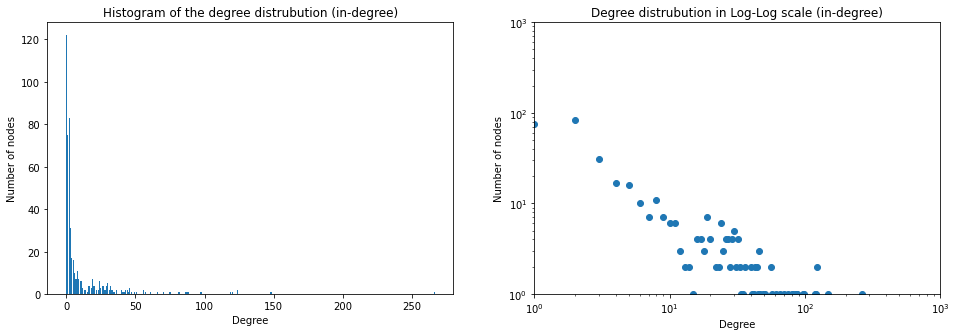

In [22]:
degs_in = [(v) for (e,v) in GCC.in_degree]
plot_degree_dist(degs_in, "(in-degree)")

k_min: 0, k_max: 91


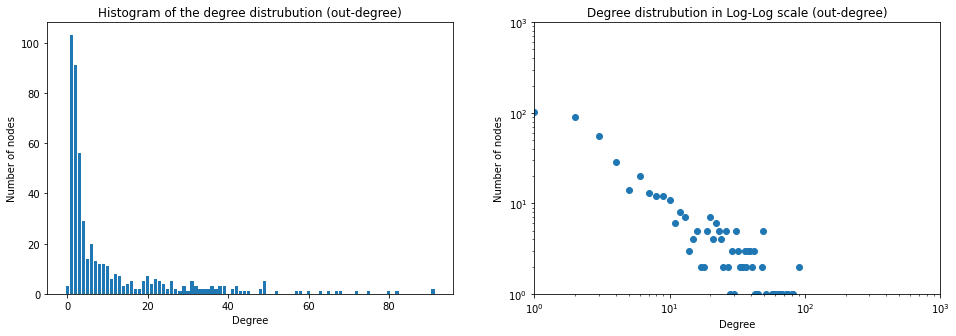

In [23]:
degs_out = [(v) for (e,v) in GCC.out_degree]
plot_degree_dist(degs_out, "(out-degree)")

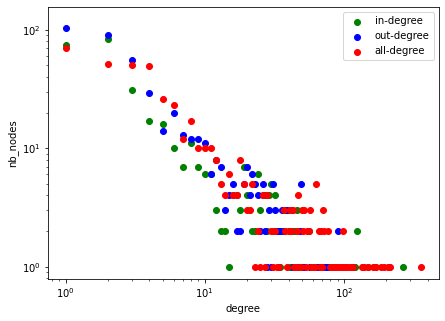

In [24]:
from collections import Counter
w_in = Counter(degrees_in)
w_out= Counter(degrees_out)
w= Counter(all_degree)
plt.figure(figsize=(7, 5)) 

plt.scatter(list(w_in.keys()), list(w_in.values()),color='g', label='in-degree')
plt.scatter(list(w_out.keys()), list(w_out.values()),color='b', label='out-degree')
plt.scatter(list(w.keys()), list(w.values()),color='r', label='all-degree')

plt.xlabel('degree')
plt.ylabel('nb_nodes')
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

In [25]:
import powerlaw
import warnings
warnings.filterwarnings("ignore")
in_exponent = powerlaw.Fit(degrees_in).power_law.alpha
out_exponent = powerlaw.Fit(degrees_out).power_law.alpha
total_exponent = powerlaw.Fit(all_degree).power_law.alpha

print("Degree exponent for in-degree: ", in_exponent)
print("Degree exponent for out-degree: ", out_exponent)
print("Degree exponent for total-degree: ", total_exponent)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Degree exponent for in-degree:  2.756783466628254
Degree exponent for out-degree:  3.747639145949768
Degree exponent for total-degree:  2.9801239417914562


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


### 2.3 Visualization <a class="anchor" id="s_2_3"></a>

In [26]:
def top_n_most_connected(house,n=3):
    df_house_degree=df_degree.loc[df_degree['House']==house]

    return list(df_house_degree.sort_values(by='all_degree',ascending=False)['Name'][:n])
sorted(set(df['House']))

['Gryffindors', 'Hufflepuffs', 'Ravenclaws', 'Slytherins', 'Unknown_House']

In [58]:
GCC_ind= GCC.to_undirected()

House_list = list(nx.get_node_attributes(GCC_ind,'House').values())

color_list, uniques = pd.factorize(House_list)
d = nx.degree(GCC_ind)

house_list = ['Gryffindors', 'Hufflepuffs', 'Ravenclaws', 'Slytherins', 'Unknown_House']
color_list = ['firebrick','dimgrey','navy','forestgreen','yellow']
zip_iterator = zip(house_list, color_list)
dict_color = dict(zip_iterator)

dict_nodes={}
dict_size={}
dict_label={}
i=0
for house in set(df['House']):
    dict_nodes[house]=[x for x,y in GCC_ind.nodes(data=True) if y['House']==house]
    dict_size[house]=np.array([d[x]+1 for x in dict_nodes[house]])*4
    n=3
    if house == 'Gryffindors':
        n=4
    elif house == 'Slytherins':
        n=3
    else: n=3
    dict_label[house]={name:name if name in top_n_most_connected(house,n) else " " for name,y in GCC_ind.nodes(data=True) if y['House']==house}
    
    i+=1
#Color edges
edges = GCC_ind.edges()
color = []
width_egde=[]

for u,v in edges:
    if df.loc[df['Name']==u].House.values[0]=="Gryffindors" and df.loc[df['Name']==v].House.values[0]=="Gryffindors":
        color.append('firebrick')
        width_egde.append(0.5)
    elif df.loc[df['Name']==u].House.values[0]=="Hufflepuffs" and df.loc[df['Name']==v].House.values[0]=="Hufflepuffs":
        color.append('dimgrey')
        width_egde.append(0.5)

    elif df.loc[df['Name']==u].House.values[0]=="Ravenclaws" and df.loc[df['Name']==v].House.values[0]=="Ravenclaws":
        color.append('navy')
        width_egde.append(0.5)

    elif df.loc[df['Name']==u].House.values[0]=="Slytherins" and df.loc[df['Name']==v].House.values[0]=="Slytherins":
        color.append('forestgreen')     
        width_egde.append(0.5)
    elif df.loc[df['Name']==u].House.values[0]=="Unknown_house" and df.loc[df['Name']==v].House.values[0]=="Unknown_house":
        color.append('yellow')     
        width_egde.append(0.5)
    
#     elif df.loc[df['Name']==u].House.values[0]=="Gryffindors" and df.loc[df['Name']==v].House.values[0]=="Slytherins" \
#         and d[df.loc[df['Name']==u].Name.values[0]]>60 and d[df.loc[df['Name']==v].Name.values[0]]>60 :
#         color.append('black')     
#         width_egde.append(1)
    else:
        color.append('whitesmoke')
        width_egde.append(0.1)
        
# # pos = nx.kamada_kawai_layout(GCC_ind)
pos_1 = nx.shell_layout(GCC_ind) #GOOD ONE ! 
pos_2 =nx.spring_layout(GCC_ind,k=9,iterations=115,pos=pos_1)

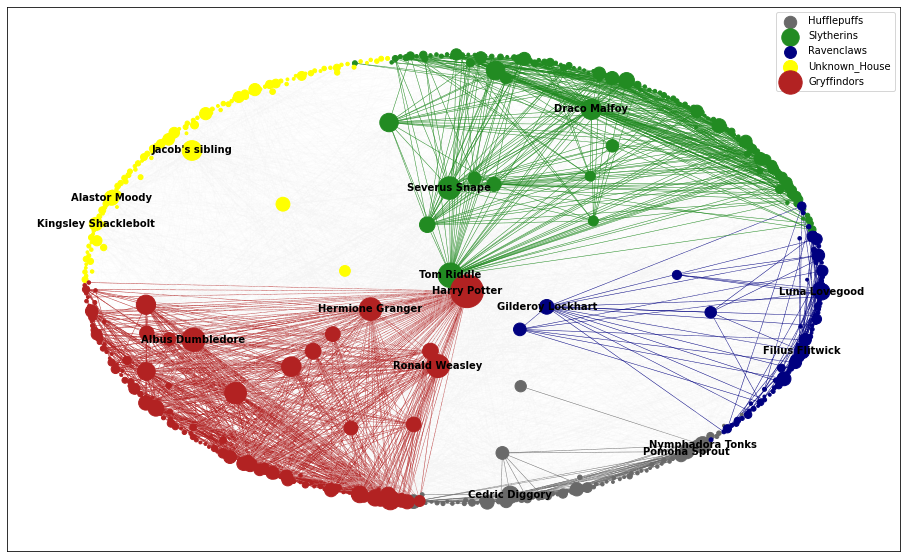

In [59]:
plt.figure(figsize=(16,10))

for house in set(df['House']):
    nx.draw_networkx_nodes(GCC_ind, pos=pos_2, nodelist=dict_nodes[house],node_size=dict_size[house],
                       node_color=dict_color[house], label=house)
    nx.draw_networkx_labels(GCC_ind,pos=pos_2,labels=dict_label[house], font_size=10,font_weight='bold')
    
nx.draw_networkx_edges(GCC_ind, pos=pos_2,edge_color=color,width=width_egde)

plt.legend()
plt.show()

In [68]:
G = GCC.copy()
colorParm = []
node_sizes = []
degree_dict = {n: d for n, d in G.degree()}
for node in G.nodes():
    if G.nodes[node]['House'] == "Gryffindors":
        colorParm.append("#660000") # Allies in blue
    elif G.nodes[node]['House'] == "Hufflepuffs":
        colorParm.append("#FF9D0B") # Enemies in red
    elif G.nodes[node]['House'] == "Ravenclaws":
        colorParm.append("#1A3956") #  Bosses in purple
    elif G.nodes[node]['House'] == "Slytherins":
        colorParm.append("#2F751C") # Enemies in red
    elif G.nodes[node]['House'] == "Unknown_house":
        colorParm.append("#aa00aa") #  Bosses in purple
    else:
        colorParm.append("#c7c7c7")
    node_sizes.append(degree_dict[node])
    
 

In [69]:
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1,

                        # Performance
                        jitterTolerance=10,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=15,
                        strongGravityMode=False,
                        gravity = 500,

                        # Log
                        verbose=True)

new_node_sizes = [x * 10 for x in node_sizes]
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=1000)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 185.99it/s]

BarnesHut Approximation  took  0.94  seconds
Repulsion forces  took  4.15  seconds
Gravitational forces  took  0.03  seconds
Attraction forces  took  0.03  seconds
AdjustSpeedAndApplyForces step  took  0.12  seconds


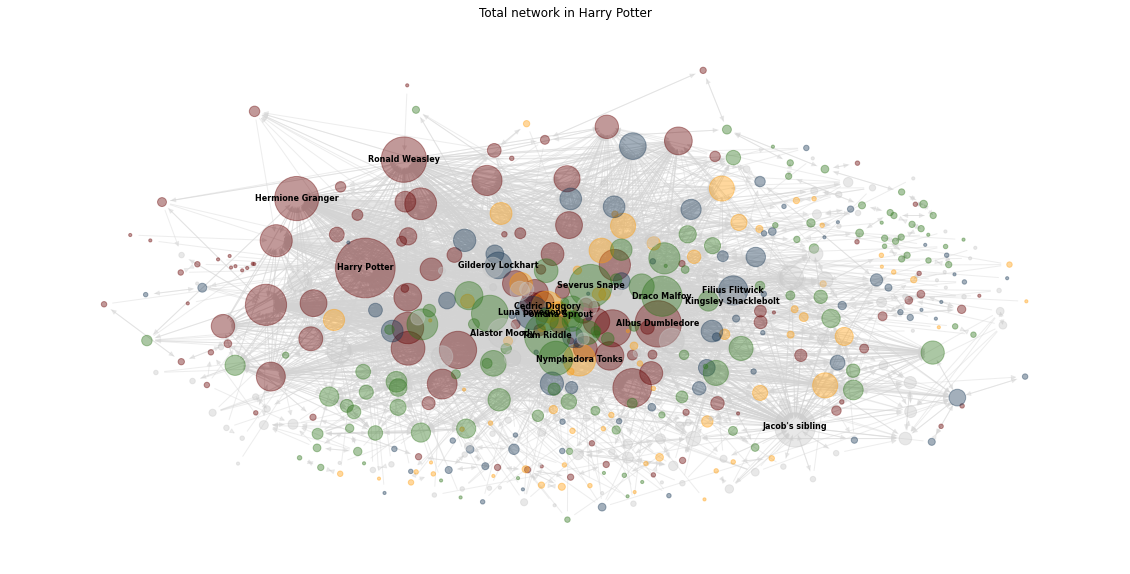

In [70]:
fig = plt.figure(figsize=(20, 10))
nx.draw_networkx_nodes(G, positions, node_size=new_node_sizes, node_color=colorParm, alpha=0.4)
nx.draw_networkx_edges(G, positions, edge_color="lightgray", alpha=0.4)
for house in set(df['House']):
    nx.draw_networkx_labels(G,pos=positions,labels=dict_label[house], font_size=8,font_weight='bold')


plt.title("Total network in Harry Potter")
plt.axis('off')
fig.show()

In [66]:
House_list = list(nx.get_node_attributes(GCC_ind,'Name').values())

color_list, uniques = pd.factorize(House_list)

d = nx.degree(GCC_ind)

nodesGryffindors = [x for x,y in GCC_ind.nodes(data=True) if y['House']=="Gryffindors"]
nodesHufflepuffs = [x for x,y in GCC_ind.nodes(data=True) if y['House']=="Hufflepuffs"]
nodesRavenclaws = [x for x,y in GCC_ind.nodes(data=True) if y['House']=="Ravenclaws"]
nodesSlytherins = [x for x,y in GCC_ind.nodes(data=True) if y['House']=="Slytherins"]
nodesUnknown_house = [x for x,y in GCC_ind.nodes(data=True) if y['House']=="Unknown_house"]

node_size_Gryffindors =np.array([d[x]+1 for x in nodesGryffindors])*4
node_size_Hufflepuffs =np.array([d[x]+1 for x in nodesHufflepuffs])*4
node_size_Ravenclaws =np.array([d[x]+1 for x in nodesRavenclaws])*4
node_size_Slytherins =np.array([d[x]+1 for x in nodesSlytherins])*4
node_size_Unknown_house =np.array([d[x]+1 for x in nodesUnknown_house])*4

#Color edges
edges = GCC_ind.edges()
color = []
for u,v in edges:
    if df.loc[df['Name']==u].House.values[0]=="Gryffindors" and df.loc[df['Name']==v].House.values[0]=="Gryffindors":
        color.append('lightgreen')
    elif df.loc[df['Name']==u].House.values[0]!="Hufflepuffs" and df.loc[df['Name']==v].House.values[0]!="Hufflepuffs":
        color.append('orange')
    elif df.loc[df['Name']==u].House.values[0]!="Ravenclaws" and df.loc[df['Name']==v].House.values[0]!="Ravenclaws":
        color.append('orange')
    elif df.loc[df['Name']==u].House.values[0]!="Slytherins" and df.loc[df['Name']==v].House.values[0]!="Slytherins":
        color.append('orange')
    elif df.loc[df['Name']==u].House.values[0]!="Unknown_house" and df.loc[df['Name']==v].House.values[0]!="Unknown_house":
        color.append('orange')
        
pos = nx.kamada_kawai_layout(GCC_ind)

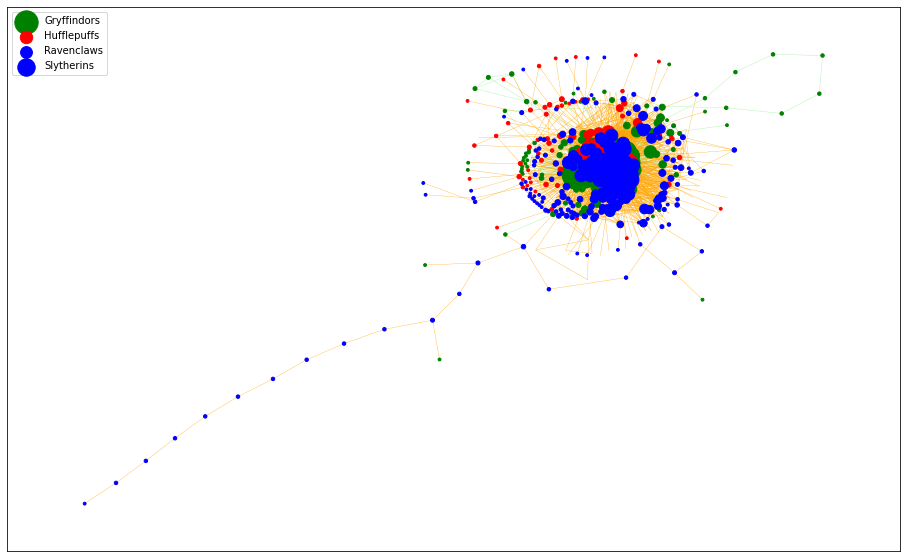

In [67]:
plt.figure(figsize=(16,10))

nx.draw_networkx_nodes(GCC_ind, pos=pos, nodelist=nodesGryffindors,node_size=node_size_Gryffindors,
                       node_color='green', label='Gryffindors')
nx.draw_networkx_nodes(GCC_ind, pos=pos, nodelist=nodesHufflepuffs,node_size=node_size_Hufflepuffs,
                       node_color='red', label='Hufflepuffs')
nx.draw_networkx_nodes(GCC_ind, pos=pos, nodelist=nodesRavenclaws,node_size=node_size_Ravenclaws,
                       node_color='blue', label='Ravenclaws')
nx.draw_networkx_nodes(GCC_ind, pos=pos, nodelist=nodesSlytherins,node_size=node_size_Slytherins,
                       node_color='blue', label='Slytherins')
nx.draw_networkx_nodes(GCC_ind, pos=pos, nodelist=nodesUnknown_house,node_size=node_size_Unknown_house,
                       node_color='blue', label='Unknown_house')
nx.draw_networkx_edges(GCC_ind, pos=pos,edge_color=color,width=0.3)
# nx.draw_kamada_kawai(GCC_ind_ind,node_color =color_list)
# pos = nx.spring_layout(G) #to fix the layout
# nx.draw(G, with_labels=False, pos=pos,node_color= np.array(colors)[gender_color])
plt.legend()
plt.show()

## 3. Tools, theory and analysis <a class="anchor" id="c3"></a>

### 3.1 Project 1: WordCloud analysis of houses <a class="anchor" id="s3_1"></a>

#### i. Points of interest

This part is about analysing the different houses of Hogwarts with the use of wordclouds, i.e. we will generate images consisting of words, with the size of the words in the image proportional to the number of times that word appear in the string used to generate the image. Firstly, we want to analyse how the members of the different houses speak and see if there are any patterns/trends there. Secondly, we want to use the characters' wiki-descriptions to look for any trends/differences between the houses.

#### ii. Explain the tool

##### Part a: WordClouds based on character dialogue

For the analysis of the way members of the different houses speak, we will use the movie scripts data. In order to have useful data for this part, we will need to load and prepare the movie data, which can be done in the following steps:

- Step 1: Load the dialogues from all 8 movies into one pandas DataFrame. Each row in this DataFrame is one dialogue, where the movie name is given in one column, the name of the character speaking is given in another column, the chapter name in a third column, and finally the actual dialogue in a the last column.
- Step 2: Change some of the names in the dataframe, as there are a few spelling mistakes, and some characters such as Voldemort are referred to as both Voldemort and Tom Riddle. We want just one name per character.
- Step 3: Add the House of the character, which is done using the data obtained from the Wiki page.
- Step 4: A brief cleaning of the data consisting of removing any character that isn't a letter or an apostrophe, and putting it all in lowercase
- Step 5: Tokenize the dialogue. For this a function is created. This function takes the dialogue input as a string and returns a list of words (tokens). It does so with the use of the NLTK library's lemmatizer and tokenizer. The tokenizer function also splits up contracted words into their base words, and removes stop words as they aren't useful for this.
- Step 6: Combine all the dialogues for each unique character, creating a long list of tokens consisting of every word (apart from the removed stopwords) each character has said throughout the 8 movies.

Once the data has been prepared we can start analysing it using the wordcloud library. One way to do this is to simply combine all tokens of characters belonging to one house, convert them into one string, and then use that string to generate the wordcloud. While this should provide a decent representation, there is a better way to do it, that is, using the tc-idf score of the words. The tc-idf score of a word is the product of its term count and the inverse document frequency, where term count is the number of times that word appears in a document (in our case a charater's complete dialogue) and the inverse document frequency is the log of the total number of documents divided by the number of documents in which the word appears. Using the tc-idf ensures that words which don't appear often have a greater importance, meaning the more unique words said by characters will be weighted more, hence the differences should be more noticeable using this method.

We will use both methods and compared the results. We will first create the wordclouds simply based on the characters' pure dialogue for each house where the steps are as follows:

- Step 7: Combine all characters of the same house
- Step 8: Create a wordcloud for each house to get the wordclouds based on the characters' pure dialogue.

We will then create the wordclouds based on the words' tc-idf scores, where the steps are as follows:

- Step 9: Calculate the term count (tc) of each word. Here we will use the dataframe created in Step 6, the one containing each character's complete dialogue. We will count the number of times a word occurs in each character's complete dialogue, and store it in a dataframe.
- Step 10: Calculate the inverse document frequency (idf).
- Step 11: Calculate tc-idf.
- Step 12: Combine all characters of the same house.
- Step 13: Convert the tc-idf scores of the words to a string of words. The string is made by adding a word x times to the string, where x is the tc-idf score of said word converted to the nearest integer.
- Step 14: Create the wordclouds.

##### Part b: WordcCouds based on character wiki-pages

For the analysis of the characters' wiki-pages, we will use the DataFrame created from the Harry Potter wiki pages. We will again need to prepare this data, however as most of this has already been done, this part is fairly short and just about loading the right data. The steps are as follow:

- Step 1: Load the DataFrame using pickle
- Step 2: Add the characters' wiki-pages descriptions. As these have already been downloaded and saved as files in the folder 'Description_extract', we simply need to add these files to the DataFrame. We also need to remove stopwords and lemmatize the extract, which is also done in this step.
- Step MAYBE: Prepare the data some more???
- Step MAYBE: Remove characters who don't belong to any house

Now that our data has been prepared, we will again create WordClouds based on both the pure character descriptions, and the tc-idf scores of the words. We will start with the pure descriptions, where the steps are as follows:

- Step 3: Combine characters of the same house.
- Step 4: Create the WordClouds

We will now create the WordClouds based on the tc-idf scores in a similar fashion as in part a. The steps are as follows:

- Step 5: Calculate the term count (tc) of each word. We will count the number of times a word occurs in each character's wiki description, and store it in a dataframe.
- Step 6: Calculate the inverse document frequency (idf).
- Step 7: Calculate tc-idf.
- Step 8: Combine all characters of the same house.
- Step 9: Convert the tc-idf scores of the words to a string of words. The string is made by adding a word x times to the string, where x is the tc-idf score of said word converted to the nearest integer.
- Step 10: Create the wordclouds.

#### iii. Applying the tool

##### Part a: WordClouds based on character dialogue

In this section we will follow the steps described in the previous section.

In [2]:
# Function to create tokens (list of words)
def to_tokens(text):
    
    # Init the Wordnet Lemmatizer and get stop words
    lemmatizer = WordNetLemmatizer()
    tk = WordPunctTokenizer()
    stop_words = set(stopwords.words('english')) 
    
    tokens = []
    for word in text.split():
        if word.lower() in contractions:
            # Add contracted word(s) if it contains an apostrophe
            contracted_words = contractions[word.lower()]
            for x in contracted_words.split():
                tokens.append(x)
        else:
            tokens.append(word)
    # Remove stopwords
    tokens = [lemmatizer.lemmatize(w) for w in tokens if (not w in stop_words) and (w.isalnum())]
    return tokens

In [3]:
# Step 1: Create dataframe from all scripts
path='hp-dataset_script'
df_script = pd.concat([pd.read_csv(path+file) for file in ['\hp1.csv','\hp2.csv','\hp3.csv','\hp4.csv',
                                                   '\hp5.csv','\hp6.csv','\hp7.csv','\hp8.csv']])

# Step 2: Change some names so they match the other dataframe
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Ron Weasley'], 'Ronald Weasley'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Ginny Weasley'], 'Ginevra Weasley'))
df_script["character"] =df_script["character"].replace(dict.fromkeys(['Tom','Voldemont','Voldemort','Voldermort'],'Tom Riddle'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Lavander Brown'], 'Lavender Brown'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Horace Horace Slughorn'], 'Horace Slughorn'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Lily Potter','Lily potter'], 'Lily J. Potter'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Pansy parkinson'], 'Pansy Parkinson'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['The Fat Lady'], 'Fat Lady'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Collin Creevey'], 'Colin Creevey'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Bill Weasley'], 'William Weasley'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['James Potter'], 'James Potter I'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Moaning Myrtle'], 'Myrtle Warren'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Nearly Headless Nick'], 'Nicholas de Mimsy-Porpington'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Phineas'], 'Phineas Nigellus Black'))


# Open other df_script and get house data
with open(r"pickle_network_prep.txt", "rb") as fp:   # Unpickling
    df_all = pickle.load(fp)

# Step 3: Add house data to current dataframe
df_house = df_all[['Name', 'House']].rename(columns={'Name': 'character'})
df_script = pd.merge(df_script, df_house, on="character", how='left')


# Step 4: Clean data
brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df_script['dialog'])
df_script["clean"] = pd.DataFrame({'clean': brief_cleaning})
df_script['len_clean']=df_script["clean"].apply(len)

# Step 5: Create tokens
df_script['tokens'] = df_script["clean"].apply(lambda x: to_tokens(x))

df_script.head()

movie            chapter  \
0  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
1  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
2  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
3  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
4  Harry Potter and the Philosopher's Stone  Doorstep Delivery   

            character                                             dialog  \
0    Albus Dumbledore  I should have known that you would be here...P...   
1  Minerva McGonagall  Good evening, Professor Dumbledore. Are the ru...   
2    Albus Dumbledore   I'm afraid so, Professor. The good, and the bad.   
3  Minerva McGonagall                                       And the boy?   
4    Albus Dumbledore                            Hagrid is bringing him.   

         House                                              clean  len_clean  \
0  Gryffindors  i should have known that you would be here pro...         64   
1  Gryffindors  good evening professor dumbledore are the rumo...         61   
2  Gryffindors      i'm afraid so professor the good and the bad          45   
3  Gryffindors                                       and the boy          12   
4  Gryffindors                            hagrid is bringing him          23   

                                              tokens  
0              [known, would, professor, mcgonagall]  
1  [good, evening, professor, dumbledore, rumour,...  
2                     [afraid, professor, good, bad]  
3                                              [boy]  
4                                 [hagrid, bringing]

In [4]:
# Step 6: Combine all the dialogues for each unique character

# Function to combine the dialogue for each character
def combine_lists(name):
    x = list(df_script.groupby(['character']).get_group(name)['tokens'])
    flat_list = [item for sublist in x for item in sublist]
    return flat_list

# Create a new dataframe with one row per character
df_temp = pd.DataFrame(sorted(list(df_script.character.unique())), columns =['character'])
df_characters = pd.merge(df_temp, df_house, on="character", how='left')

# Add all the tokens of each characters
df_characters['tokens'] = df_characters['character'].apply(lambda x: combine_lists(x))

# Add the lengths of the tokens
df_characters['token_lengths'] = df_characters['tokens'].apply(lambda x: len(x))

##  Remove the characters who say less than 50 words
#df_characters = df_characters.drop(df_characters[df_characters.token_lengths < 50].index)
#df_characters = df_characters.reset_index(drop=True)

df_characters.head()

character        House  \
0  Aberforth Dumbledore      Unknown   
1         Alastor Moody      Unknown   
2      Albus Dumbledore  Gryffindors   
3          Albus Potter   Slytherins   
4         Alecto Carrow   Slytherins   

                                              tokens  token_lengths  
0  [potter, bloody, fool, thinking, coming, idea,...            109  
1  [stupid, roof, alastor, moody, ministry, malco...            570  
2  [known, would, professor, mcgonagall, afraid, ...           3635  
3  [really, thestrals, pulling, carriage, dad, pu...             10  
4  [put, smile, miss, reynolds, would, want, pay,...             10

In [5]:
# Step 7: Combine characters' dialogue by house

# Split dataframe by House
df_groups = df_characters.groupby(['House'])

# Combine all dialoges for each House
Gryffindor_list = [item for sublist in list(df_groups.get_group('Gryffindors')["tokens"]) for item in sublist]
Ravenclaw_list = [item for sublist in list(df_groups.get_group('Ravenclaws')["tokens"]) for item in sublist]
Slytherin_list = [item for sublist in list(df_groups.get_group('Slytherins')["tokens"]) for item in sublist]
Hufflepuff_list = [item for sublist in list(df_groups.get_group('Hufflepuffs')["tokens"]) for item in sublist]
#Unknown_list = [item for sublist in list(df_groups.get_group('Unknown')["tokens"]) for item in sublist]

all_sentences = []
for x in [Gryffindor_list, Ravenclaw_list, Slytherin_list, Hufflepuff_list]:
    all_sentences.append(" ".join(x))

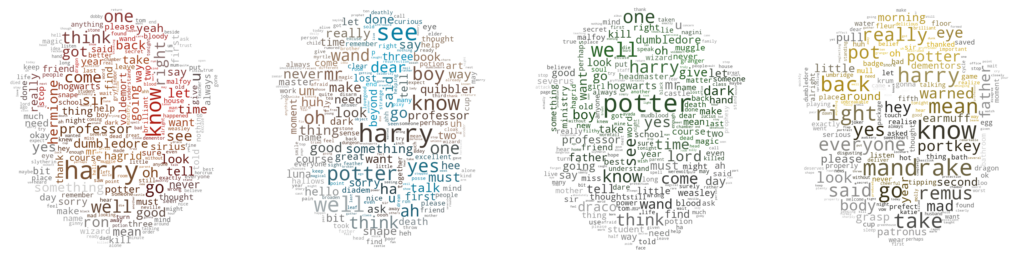

In [24]:
# Step 8: Create a wordcloud for each house to get the wordclouds based on the characters' pure dialogue
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (18,14))
# Wordclouds based on the pure characters dialogue (no tc-idf)
houses = ['Gryffindor', 'Ravenclaw', 'Slytherin', 'Hufflepuff']
for i in range(len(houses)):
    
    # load image which is used for shape and colour of wordcloud
    mask = np.array(Image.open(f'house_images/{houses[i]}.png').convert('RGB'))
    image_colors = ImageColorGenerator(mask)
    
    # Create the wordcloud
    wc = WordCloud(background_color='white', max_words=250, mask = mask,
                   max_font_size=80, collocations = False).generate(all_sentences[i])

    # Plot each wordcloud
    ax = axs[i]
    #ax = axs[i//2,i%2]
    ax.plot()
    ax.axis("off")
    ax.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")

In [7]:
# Step 9: Calculate term count

vocabulary = set(df_characters['tokens'].explode())
temp_tc = []

# Loop through all characters
for index, row in df_characters.iterrows():
    
    # Create empty frequency table and fill it up
    freq_table = dict.fromkeys(vocabulary,0)
    for word in row['tokens']:
        if word in vocabulary:
            freq_table[word] += 1
    # Add frequency table to temporary tc
    temp_tc.append(pd.DataFrame.from_dict(freq_table, orient='index',columns=[row['character']]))

# Create dataframe
tc = pd.concat(temp_tc,axis=1)
tc.head()

Aberforth Dumbledore  Alastor Moody  Albus Dumbledore  Albus Potter  \
NaN                          0              0                 0             0   
bogey                        0              0                 0             0   
unnerve                      0              0                 0             0   
cornered                     0              0                 0             0   
guilty                       0              0                 1             0   

          Alecto Carrow  All  Amos Diggory  Angelina Johnson  Announcer  \
NaN                   0    0             0                 0          0   
bogey                 0    0             0                 0          0   
unnerve               0    0             0                 0          0   
cornered              0    0             0                 0          0   
guilty                0    0             0                 0          0   

          Arabella Figg  ...  Waitress  Wakanda  Walburga Black  \
NaN                   0  ...         0        0               0   
bogey                 0  ...         0        0               0   
unnerve               0  ...         0        0               0   
cornered              0  ...         0        0               0   
guilty                0  ...         0        0               0   

          Whomping Willow  William Weasley  Witch  Wizard  Woman  \
NaN                     0                0      0       0      0   
bogey                   0                0      0       0      0   
unnerve                 0                0      0       0      0   
cornered                0                0      0       0      0   
guilty                  0                0      0       0      0   

          Xenophilius Lovegood  Zacharias Smith  
NaN                          0                0  
bogey                        0                0  
unnerve                      0                0  
cornered                     0                0  
guilty                       0                0  

[5 rows x 167 columns]

In [8]:
# Step 10: Calculate inverse document frequency

temp_idf=[]
for element in tc.to_numpy():
    temp_idf.append(np.log (len(df_characters)/(1+len(np.where(element > 0)[0]))))
idf = pd.DataFrame(temp_idf, index=vocabulary, columns=['idf'])
idf.head()

idf
NaN          5.117994
flame        4.019382
vipera       4.424847
obituary     4.424847
appropriate  4.424847

In [9]:
# Step 11: Calculate tc-idf score per character

tc_idf = pd.concat([tc,idf],axis=1)
for columns in tc_idf.columns[:-1]:
    tc_idf[columns] = tc_idf[columns]*tc_idf['idf']
tc_idf.drop(columns='idf',inplace=True)
tc_idf.head()

Aberforth Dumbledore  Alastor Moody  Albus Dumbledore  \
NaN                           0.0            0.0          0.000000   
flame                         0.0            0.0          8.038763   
vipera                        0.0            0.0          0.000000   
obituary                      0.0            0.0          0.000000   
appropriate                   0.0            0.0          4.424847   

             Albus Potter  Alecto Carrow  All  Amos Diggory  Angelina Johnson  \
NaN                   0.0            0.0  0.0           0.0               0.0   
flame                 0.0            0.0  0.0           0.0               0.0   
vipera                0.0            0.0  0.0           0.0               0.0   
obituary              0.0            0.0  0.0           0.0               0.0   
appropriate           0.0            0.0  0.0           0.0               0.0   

             Announcer  Arabella Figg  ...  Waitress  Wakanda  Walburga Black  \
NaN                0.0            0.0  ...       0.0      0.0             0.0   
flame              0.0            0.0  ...       0.0      0.0             0.0   
vipera             0.0            0.0  ...       0.0      0.0             0.0   
obituary           0.0            0.0  ...       0.0      0.0             0.0   
appropriate        0.0            0.0  ...       0.0      0.0             0.0   

             Whomping Willow  William Weasley  Witch  Wizard  Woman  \
NaN                      0.0              0.0    0.0     0.0    0.0   
flame                    0.0              0.0    0.0     0.0    0.0   
vipera                   0.0              0.0    0.0     0.0    0.0   
obituary                 0.0              0.0    0.0     0.0    0.0   
appropriate              0.0              0.0    0.0     0.0    0.0   

             Xenophilius Lovegood  Zacharias Smith  
NaN                           0.0              0.0  
flame                         0.0              0.0  
vipera                        0.0              0.0  
obituary                      0.0              0.0  
appropriate                   0.0              0.0  

[5 rows x 167 columns]

In [10]:
# Step 12: Add all tc-idf scores for characters of the same house up

Gryffindor_list = list(df_characters[df_characters.House == 'Gryffindors']['character'])
Ravenclaw_list = list(df_characters[df_characters.House == 'Ravenclaws']['character'])
Slytherin_list = list(df_characters[df_characters.House == 'Slytherins']['character'])
Hufflepuff_list = list(df_characters[df_characters.House == 'Hufflepuffs']['character'])

tc_idf['Gryffindor'] = tc_idf[Gryffindor_list].sum(axis=1)
tc_idf['Ravenclaw'] = tc_idf[Ravenclaw_list].sum(axis=1)
tc_idf['Slytherin'] = tc_idf[Slytherin_list].sum(axis=1)
tc_idf['Hufflepuff'] = tc_idf[Hufflepuff_list].sum(axis=1)
tc_idf.head()

Aberforth Dumbledore  Alastor Moody  Albus Dumbledore  \
NaN                           0.0            0.0          0.000000   
flame                         0.0            0.0          8.038763   
vipera                        0.0            0.0          0.000000   
obituary                      0.0            0.0          0.000000   
appropriate                   0.0            0.0          4.424847   

             Albus Potter  Alecto Carrow  All  Amos Diggory  Angelina Johnson  \
NaN                   0.0            0.0  0.0           0.0               0.0   
flame                 0.0            0.0  0.0           0.0               0.0   
vipera                0.0            0.0  0.0           0.0               0.0   
obituary              0.0            0.0  0.0           0.0               0.0   
appropriate           0.0            0.0  0.0           0.0               0.0   

             Announcer  Arabella Figg  ...  William Weasley  Witch  Wizard  \
NaN                0.0            0.0  ...              0.0    0.0     0.0   
flame              0.0            0.0  ...              0.0    0.0     0.0   
vipera             0.0            0.0  ...              0.0    0.0     0.0   
obituary           0.0            0.0  ...              0.0    0.0     0.0   
appropriate        0.0            0.0  ...              0.0    0.0     0.0   

             Woman  Xenophilius Lovegood  Zacharias Smith  Gryffindor  \
NaN            0.0                   0.0              0.0    0.000000   
flame          0.0                   0.0              0.0   12.058145   
vipera         0.0                   0.0              0.0    0.000000   
obituary       0.0                   0.0              0.0    0.000000   
appropriate    0.0                   0.0              0.0    4.424847   

             Ravenclaw  Slytherin  Hufflepuff  
NaN                0.0   0.000000         0.0  
flame              0.0   0.000000         0.0  
vipera             0.0   4.424847         0.0  
obituary           0.0   0.000000         0.0  
appropriate        0.0   0.000000         0.0  

[5 rows x 171 columns]

In [11]:
# Step 13: Convert tc-idf scores to a string of words relative to the scores

houses = ['Gryffindor', 'Ravenclaw', 'Slytherin', 'Hufflepuff']
houses_tcidf = tc_idf[houses]
houses_descriptions = [""]*len(houses)

for i in range(len(houses)):
    
    # Create list of words by their tc-idf scores
    words = []
    for word in vocabulary:
        count = int(houses_tcidf[houses[i]][word])
        words = words + [word]*count
        
    # Convert list to a string
    houses_descriptions[i] = " ".join(words)

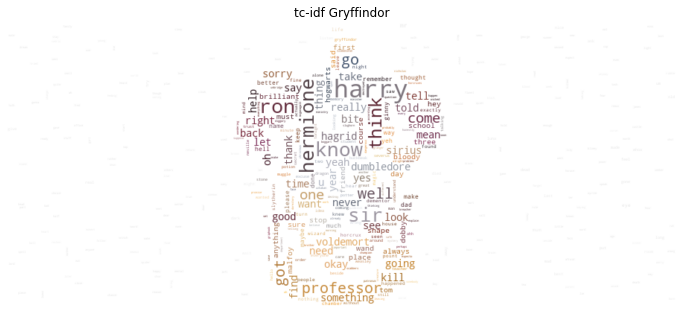

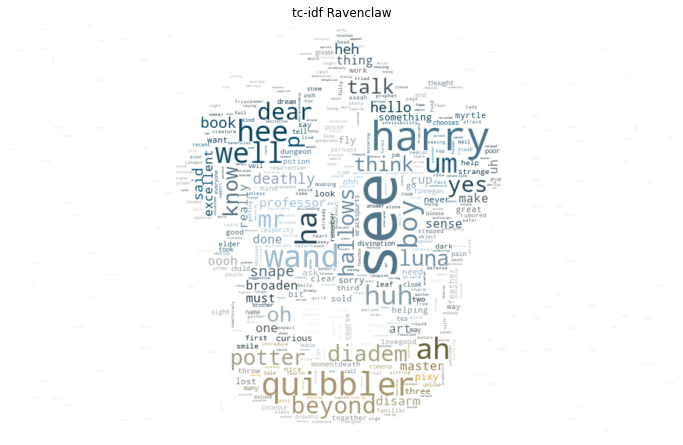

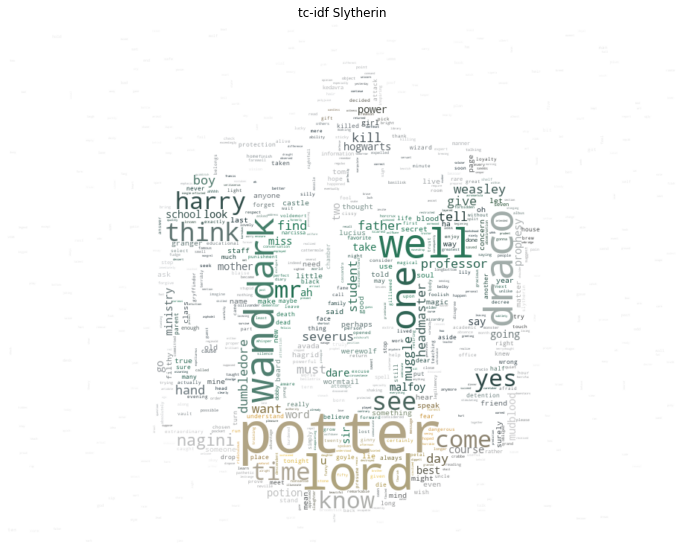

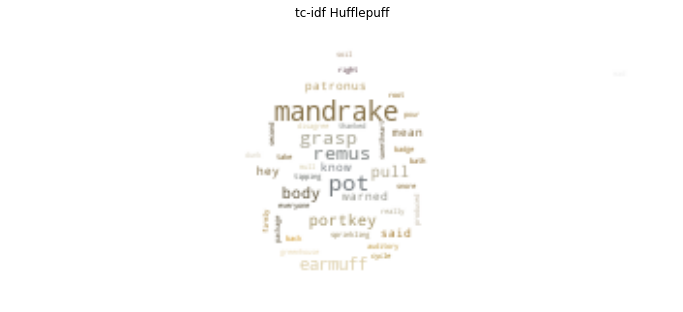

In [12]:
# Step 14: Wordclouds based on the tc-idf scores

for i in range(len(houses)):
    
    # load image which is used for shape and colour of wordcloud
    mask = np.array(Image.open(f'house_images/{houses[i]}.png').convert('RGB'))
    image_colors = ImageColorGenerator(mask)
    
    # Create the wordcloud
    wc = WordCloud(background_color='white', max_words=1000, mask = mask,
                   max_font_size=80, collocations = False).generate(houses_descriptions[i])

    # Plot each wordcloud
    plt.figure(figsize=(12, 12))
    plt.title('tc-idf ' + houses[i])
    plt.axis("off")
    plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")

##### Part b: WordClouds based on character wiki-pages

We will again follow the steps from the previous section

In [13]:
# Step 1: Load the DataFrame
with open(r"pickle_network_prep.txt", "rb") as fp:
    df_all = pickle.load(fp)

In [14]:
# Step 2: Add the character description files to the DataFrame

tk = WordPunctTokenizer()
names_list = [n.lower() for n in df_all.Name]
stop_words = set(stopwords.words('english'))
page_path = "Description_extract/"
lemmatizer = WordNetLemmatizer()

list_description_extract = []
for index, row in df_all.iterrows():
    with open(page_path+row['Name']+'.txt','r') as f:
        # Remove whitespace characters
        node_description = f.read().replace('\\n', '').replace('\\t', '').replace('"', '')
        
        # Put lower case
        node_description = node_description.lower()
    
        # Remove names
        for name in names_list:
            node_description = re.sub(name+'(?:s*)','', node_description)
        
        # Tokenize and remove stopwords
        node_description = tk.tokenize(node_description)
        node_description = [lemmatizer.lemmatize(w) for w in node_description if (not w in stop_words) and (w.isalnum())]
    list_description_extract.append(node_description)
    
df_all["Description_extract"] = list_description_extract

In [15]:
df_all.head()

Name        House  Gender    Blood Species Nationality  \
0  Euan Abercrombie  Gryffindors    Male  Unknown   Human      GBorIE   
1      Sakura Akagi  Gryffindors  Female  Unknown   Human      GBorIE   
2       Zakir Akram  Gryffindors    Male  Unknown   Human      GBorIE   
3         Nick Alas  Gryffindors    Male  Unknown   Human      GBorIE   
4   Filemina Alchin  Gryffindors  Female  Unknown   Human      GBorIE   

     Heigh   Weight     Hair     Eyes     Skin  \
0  Unknown  Unknown  Unknown  Unknown  Unknown   
1  Unknown  Unknown  Unknown  Unknown  Unknown   
2  Unknown  Unknown  Unknown  Unknown  Unknown   
3  Unknown  Unknown  Unknown  Unknown  Unknown   
4  Unknown  Unknown  Unknown  Unknown  Unknown   

                   Caracters_in_page  \
0                     [Harry Potter]   
1                                 []   
2                                 []   
3                                 []   
4  [Angelina Appleby, Astrix Alixan]   

                                 Description_extract  
0  [wizard, gryffindor, student, hogwarts, school...  
1  [gryffindor, student, hogwarts, school, witchc...  
2  [gryffindor, student, hogwarts, school, witchc...  
3  [wizard, gryffindor, student, hogwarts, school...  
4  [b, 1670s, 80, gryffindor, student, hogwarts, ...

In [16]:
# Step 3: Combine characters' dialogue by house

# Split dataframe by House
df_wiki_groups = df_all.groupby(['House'])

# Combine all dialoges for each House
Gryffindor_wiki_list = [item for sublist in list(df_wiki_groups.get_group('Gryffindors')["Description_extract"]) for item in sublist]
Ravenclaw_wiki_list = [item for sublist in list(df_wiki_groups.get_group('Ravenclaws')["Description_extract"]) for item in sublist]
Slytherin_wiki_list = [item for sublist in list(df_wiki_groups.get_group('Slytherins')["Description_extract"]) for item in sublist]
Hufflepuff_wiki_list = [item for sublist in list(df_wiki_groups.get_group('Hufflepuffs')["Description_extract"]) for item in sublist]
#Unknown_list = [item for sublist in list(df_groups.get_group('Unknown')["tokens"]) for item in sublist]

all_wiki_sentences = []
for x in [Gryffindor_wiki_list, Ravenclaw_wiki_list, Slytherin_wiki_list, Hufflepuff_wiki_list]:
    all_wiki_sentences.append(" ".join(x))

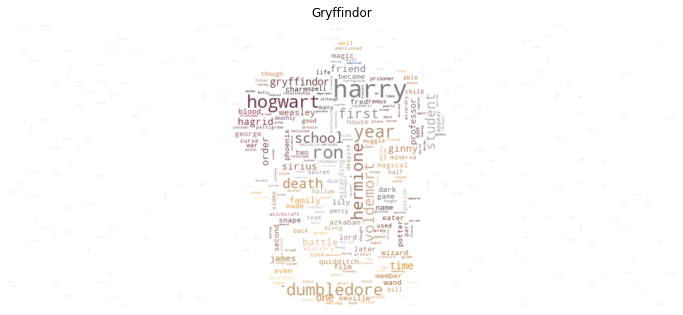

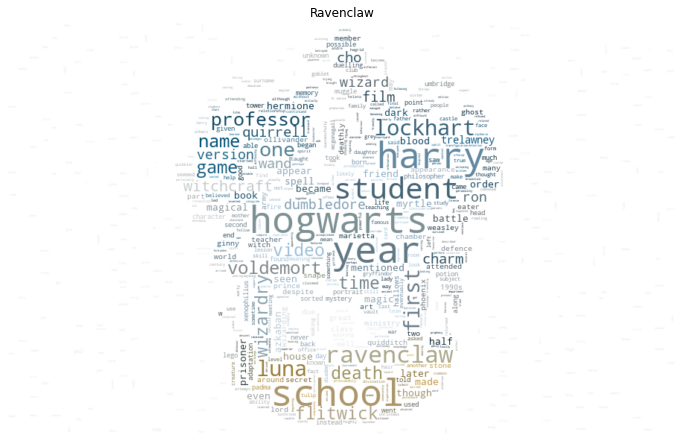

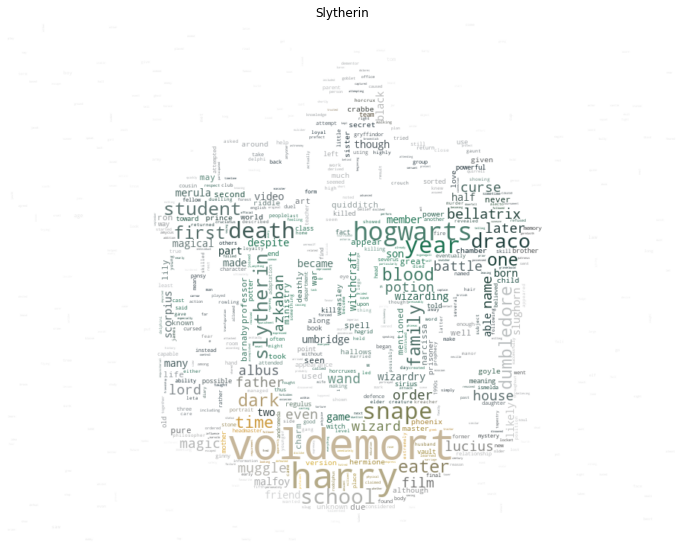

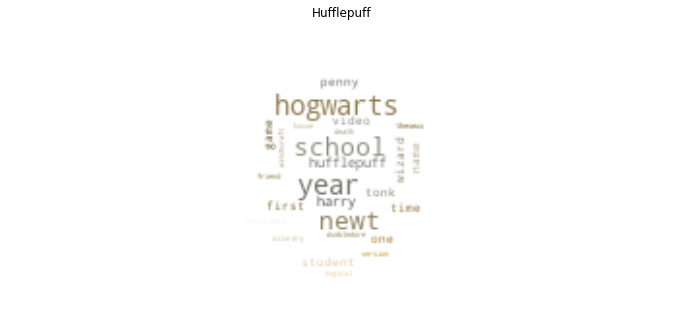

In [17]:
# Step 4: Create a WordCloud for each house to get the wordclouds based on the characters' pure wiki description

# Wordclouds based on the pure characters dialogue (no tc-idf)
houses = ['Gryffindor', 'Ravenclaw', 'Slytherin', 'Hufflepuff']
for i in range(len(houses)):
    
    # load image which is used for shape and colour of wordcloud
    mask = np.array(Image.open(f'house_images/{houses[i]}.png').convert('RGB'))
    image_colors = ImageColorGenerator(mask)
    
    # Create the wordcloud
    wc = WordCloud(background_color='white', max_words=1000, mask = mask,
                   max_font_size=80, collocations = False).generate(all_wiki_sentences[i])

    # Plot each wordcloud
    plt.figure(figsize=(12, 12))
    plt.title(houses[i])
    plt.axis("off")
    plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")

In [18]:
# Step 5: Calculate term count

wiki_vocabulary = set(df_all['Description_extract'].explode())
temp_tc = []

# Loop through all characters
for index, row in df_all.iterrows():
    
    # Create empty frequency table and fill it up
    freq_table = dict.fromkeys(wiki_vocabulary,0)
    for word in row['Description_extract']:
        if word in wiki_vocabulary:
            freq_table[word] += 1
    # Add frequency table to temporary tc
    temp_tc.append(pd.DataFrame.from_dict(freq_table, orient='index',columns=[row['Name']]))

# Create dataframe
wiki_tc = pd.concat(temp_tc,axis=1)
wiki_tc.head()

Euan Abercrombie  Sakura Akagi  Zakir Akram  Nick Alas  \
gaunts                       0             0            0          0   
protruding                   0             0            0          0   
flame                        0             0            0          0   
pince                        0             0            0          1   
breaststroke                 0             0            0          0   

              Filemina Alchin  Christian Alexander  Astrix Alixan  \
gaunts                      0                    0              0   
protruding                  0                    0              0   
flame                       0                    0              0   
pince                       0                    0              0   
breaststroke                0                    0              0   

              Brandon Angel  Jada Angela  Owen Anthony  ...  Thomas Vace  \
gaunts                    0            0             0  ...            0   
protruding                0            0             0  ...            0   
flame                     0            0             0  ...            0   
pince                     0            0             0  ...            0   
breaststroke              0            0             0  ...            0   

              Myron Wagtail  Walker (Hogwarts student)  Ivy Warrington  \
gaunts                    0                          0               0   
protruding                0                          0               0   
flame                     0                          0               0   
pince                     0                          0               0   
breaststroke              0                          0               0   

              Panju Weasley  Victoire Weasley  Simon Wilkinson  \
gaunts                    0                 0                0   
protruding                0                 0                0   
flame                     0                 0                0   
pince                     0                 0                0   
breaststroke              0                 0                0   

              William (Hogwarts student)  Winston's niece  Eldred Worple  
gaunts                                 0                0              0  
protruding                             0                0              0  
flame                                  0                0              0  
pince                                  0                0              0  
breaststroke                           0                0              0  

[5 rows x 865 columns]

In [19]:
# Step 6: Calculate inverse document frequency

temp_idf = []
for element in wiki_tc.to_numpy():
    temp_idf.append(np.log (len(df_all)/(1+len(np.where(element > 0)[0]))))
wiki_idf = pd.DataFrame(temp_idf, index=wiki_vocabulary, columns=['idf'])
wiki_idf.head()

idf
gaunts        4.970970
protruding    6.069582
flame         3.671687
pince         3.872358
breaststroke  6.069582

In [20]:
# Step 7: Calculate tc-idf score per character

wiki_tc_idf = pd.concat([wiki_tc, wiki_idf],axis=1)
for columns in wiki_tc_idf.columns[:-1]:
    wiki_tc_idf[columns] = wiki_tc_idf[columns]*wiki_tc_idf['idf']
wiki_tc_idf.drop(columns='idf',inplace=True)
wiki_tc_idf.head()

Euan Abercrombie  Sakura Akagi  Zakir Akram  Nick Alas  \
gaunts                     0.0           0.0          0.0   0.000000   
protruding                 0.0           0.0          0.0   0.000000   
flame                      0.0           0.0          0.0   0.000000   
pince                      0.0           0.0          0.0   3.872358   
breaststroke               0.0           0.0          0.0   0.000000   

              Filemina Alchin  Christian Alexander  Astrix Alixan  \
gaunts                    0.0                  0.0            0.0   
protruding                0.0                  0.0            0.0   
flame                     0.0                  0.0            0.0   
pince                     0.0                  0.0            0.0   
breaststroke              0.0                  0.0            0.0   

              Brandon Angel  Jada Angela  Owen Anthony  ...  Thomas Vace  \
gaunts                  0.0          0.0           0.0  ...          0.0   
protruding              0.0          0.0           0.0  ...          0.0   
flame                   0.0          0.0           0.0  ...          0.0   
pince                   0.0          0.0           0.0  ...          0.0   
breaststroke            0.0          0.0           0.0  ...          0.0   

              Myron Wagtail  Walker (Hogwarts student)  Ivy Warrington  \
gaunts                  0.0                        0.0             0.0   
protruding              0.0                        0.0             0.0   
flame                   0.0                        0.0             0.0   
pince                   0.0                        0.0             0.0   
breaststroke            0.0                        0.0             0.0   

              Panju Weasley  Victoire Weasley  Simon Wilkinson  \
gaunts                  0.0               0.0              0.0   
protruding              0.0               0.0              0.0   
flame                   0.0               0.0              0.0   
pince                   0.0               0.0              0.0   
breaststroke            0.0               0.0              0.0   

              William (Hogwarts student)  Winston's niece  Eldred Worple  
gaunts                               0.0              0.0            0.0  
protruding                           0.0              0.0            0.0  
flame                                0.0              0.0            0.0  
pince                                0.0              0.0            0.0  
breaststroke                         0.0              0.0            0.0  

[5 rows x 865 columns]

In [21]:
# Step 8: Add all tc-idf scores for characters of the same house up

Gryffindor_wiki_list = list(df_all[df_all.House == 'Gryffindors']['Name'])
Ravenclaw_wiki_list = list(df_all[df_all.House == 'Ravenclaws']['Name'])
Slytherin_wiki_list = list(df_all[df_all.House == 'Slytherins']['Name'])
Hufflepuff_wiki_list = list(df_all[df_all.House == 'Hufflepuffs']['Name'])

wiki_tc_idf['Gryffindor'] = wiki_tc_idf[Gryffindor_list].sum(axis=1)
wiki_tc_idf['Ravenclaw'] = wiki_tc_idf[Ravenclaw_list].sum(axis=1)
wiki_tc_idf['Slytherin'] = wiki_tc_idf[Slytherin_list].sum(axis=1)
wiki_tc_idf['Hufflepuff'] = wiki_tc_idf[Hufflepuff_list].sum(axis=1)
wiki_tc_idf.head()

Euan Abercrombie  Sakura Akagi  Zakir Akram  Nick Alas  \
gaunts                     0.0           0.0          0.0   0.000000   
protruding                 0.0           0.0          0.0   0.000000   
flame                      0.0           0.0          0.0   0.000000   
pince                      0.0           0.0          0.0   3.872358   
breaststroke               0.0           0.0          0.0   0.000000   

              Filemina Alchin  Christian Alexander  Astrix Alixan  \
gaunts                    0.0                  0.0            0.0   
protruding                0.0                  0.0            0.0   
flame                     0.0                  0.0            0.0   
pince                     0.0                  0.0            0.0   
breaststroke              0.0                  0.0            0.0   

              Brandon Angel  Jada Angela  Owen Anthony  ...  Panju Weasley  \
gaunts                  0.0          0.0           0.0  ...            0.0   
protruding              0.0          0.0           0.0  ...            0.0   
flame                   0.0          0.0           0.0  ...            0.0   
pince                   0.0          0.0           0.0  ...            0.0   
breaststroke            0.0          0.0           0.0  ...            0.0   

              Victoire Weasley  Simon Wilkinson  William (Hogwarts student)  \
gaunts                     0.0              0.0                         0.0   
protruding                 0.0              0.0                         0.0   
flame                      0.0              0.0                         0.0   
pince                      0.0              0.0                         0.0   
breaststroke               0.0              0.0                         0.0   

              Winston's niece  Eldred Worple  Gryffindor  Ravenclaw  \
gaunts                    0.0            0.0    9.941940   0.000000   
protruding                0.0            0.0   12.139165   0.000000   
flame                     0.0            0.0   77.105428   7.343374   
pince                     0.0            0.0   11.617073   0.000000   
breaststroke              0.0            0.0    6.069582   0.000000   

              Slytherin  Hufflepuff  
gaunts        34.796790    0.000000  
protruding     0.000000    0.000000  
flame         18.358435    0.000000  
pince          0.000000    7.744715  
breaststroke   0.000000    0.000000  

[5 rows x 869 columns]

In [22]:
# Step 9: Convert tc-idf scores to a string of words relative to the scores

houses = ['Gryffindor', 'Ravenclaw', 'Slytherin', 'Hufflepuff']
houses_wiki_tcidf = wiki_tc_idf[houses]
houses_wiki_descriptions = [""]*len(houses)

for i in range(len(houses)):
    
    # Create list of words by their tc-idf scores
    words = []
    for word in wiki_vocabulary:
        count = int(houses_wiki_tcidf[houses[i]][word])
        words = words + [word]*count
        
    # Convert list to a string
    houses_wiki_descriptions[i] = " ".join(words)

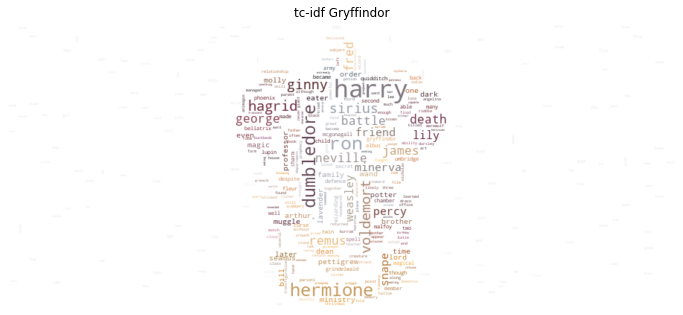

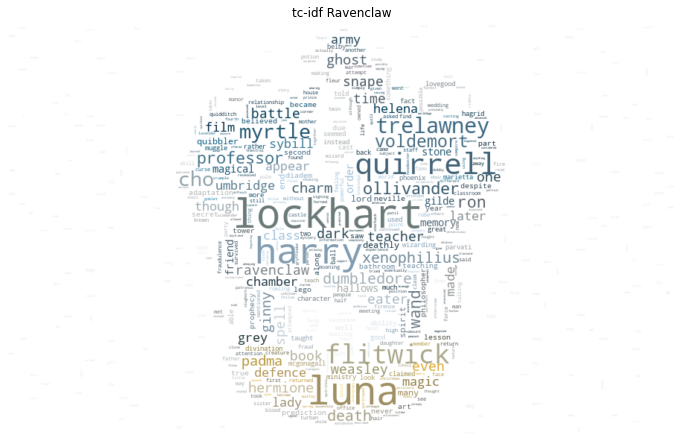

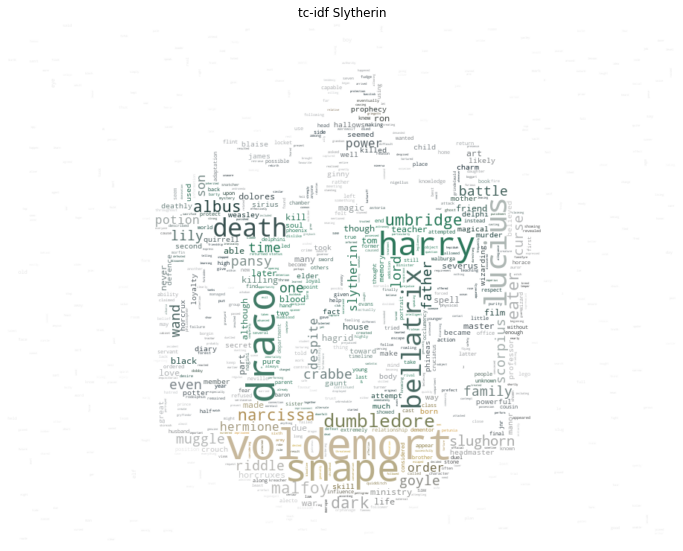

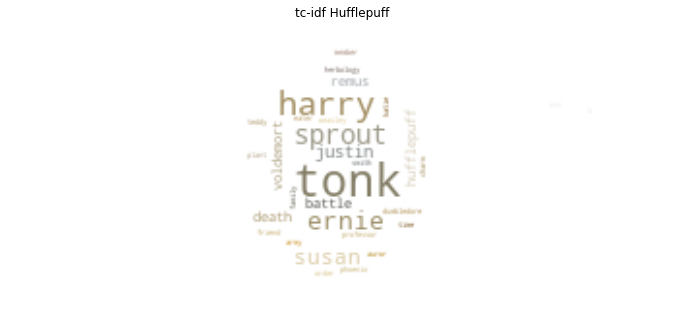

In [23]:
# Step 10: Wordclouds based on the tc-idf scores

for i in range(len(houses)):
    
    # load image which is used for shape and colour of wordcloud
    mask = np.array(Image.open(f'house_images/{houses[i]}.png').convert('RGB'))
    image_colors = ImageColorGenerator(mask)
    
    # Create the wordcloud
    wc = WordCloud(background_color='white', max_words=1000, mask = mask,
                   max_font_size=80, collocations = False).generate(houses_wiki_descriptions[i])

    # Plot each wordcloud
    plt.figure(figsize=(12, 12))
    plt.title('tc-idf ' + houses[i])
    plt.axis("off")
    plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")

### 3.2 Project 2: ... <a class="anchor" id="s3_2"></a>

### 3.3 Project 3: Sentiment Analysis  <a class="anchor" id="s3_3"></a>

#### i. Points of interest

In this section we will look at the characters' sentiment throughout the movies. We will look at the main characters' individual sentiment change throughout the movies, as well as the overall sentiment of each movie. Other ideas, such as the sentiment of each house, and the sentiment of each chapter of ech movie will also be explored. For this part, the data we will be using is the movie scripts.

#### ii. Explain the tool

First of all, as we will be working with the movie script dataset, we need to first prepare the data. We do that the same way as in [3.1 Project 1:WordCloud analysis of houses - steps 1 to 4](#s3_1) where we fix the names, add house data, and clean the text.

#### iii. Applying the tool

In [24]:
# Step 1: Create dataframe from all scripts
path='hp-dataset_script'
df_script = pd.concat([pd.read_csv(path+file) for file in ['\hp1.csv','\hp2.csv','\hp3.csv','\hp4.csv',
                                                   '\hp5.csv','\hp6.csv','\hp7.csv','\hp8.csv']])

# Step 2: Change some names so they match the other dataframe
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Ron Weasley'], 'Ronald Weasley'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Ginny Weasley'], 'Ginevra Weasley'))
df_script["character"] =df_script["character"].replace(dict.fromkeys(['Tom','Voldemont','Voldemort','Voldermort'],'Tom Riddle'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Lavander Brown'], 'Lavender Brown'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Horace Horace Slughorn'], 'Horace Slughorn'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Lily Potter','Lily potter'], 'Lily J. Potter'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Pansy parkinson'], 'Pansy Parkinson'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['The Fat Lady'], 'Fat Lady'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Collin Creevey'], 'Colin Creevey'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Bill Weasley'], 'William Weasley'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['James Potter'], 'James Potter I'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Moaning Myrtle'], 'Myrtle Warren'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Nearly Headless Nick'], 'Nicholas de Mimsy-Porpington'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Phineas'], 'Phineas Nigellus Black'))


# Open other df_script and get house data
with open(r"pickle_network_prep.txt", "rb") as fp:   # Unpickling
    df_all = pickle.load(fp)

# Step 3: Add house data to current dataframe
df_house = df_all[['Name', 'House']].rename(columns={'Name': 'character'})
df_script = pd.merge(df_script, df_house, on="character", how='left')


# Step 4: Clean data
brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df_script['dialog'])
df_script["clean"] = pd.DataFrame({'clean': brief_cleaning})
df_script['len_clean']=df_script["clean"].apply(len)

df_script.head()                    

movie            chapter  \
0  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
1  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
2  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
3  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
4  Harry Potter and the Philosopher's Stone  Doorstep Delivery   

            character                                             dialog  \
0    Albus Dumbledore  I should have known that you would be here...P...   
1  Minerva McGonagall  Good evening, Professor Dumbledore. Are the ru...   
2    Albus Dumbledore   I'm afraid so, Professor. The good, and the bad.   
3  Minerva McGonagall                                       And the boy?   
4    Albus Dumbledore                            Hagrid is bringing him.   

         House                                              clean  len_clean  
0  Gryffindors  i should have known that you would be here pro...         64  
1  Gryffindors  good evening professor dumbledore are the rumo...         61  
2  Gryffindors      i'm afraid so professor the good and the bad          45  
3  Gryffindors                                       and the boy          12  
4  Gryffindors                            hagrid is bringing him          23

##### part a: Sentiment of characters throughout the movies

In [25]:
characters = list(df_script.character.unique()[df_script.character.value_counts() >= 20])
movies = list(df_script.movie.unique())
df_movies = df_script.groupby('movie')

In [26]:
# init the sentiment analyzer
sia = SentimentIntensityAnalyzer()

sentiments_characters = []

for movie in movies:
    
    movie_df = df_movies.get_group(movie)
    vader_sentiment={}
    
    for name in characters:
        
        score_list=[]
        for index, row in movie_df.iterrows():
            if (type(row.clean) == str) and (row.len_clean>4) and (row.character == name):
                score_list.append(sia.polarity_scores(row.clean)["compound"])
        if score_list==[]:
            vader_sentiment[name]=None
        else:
            vader_sentiment[name]=round(np.array(score_list).mean(),3)
    sentiments_characters.append(vader_sentiment)

In [27]:
character_sentiment = {}
for character in characters:
    sentiment = []
    for i in range(len(movies)):
        sentiment.append(sentiments_characters[i][character])
    character_sentiment[character] = sentiment

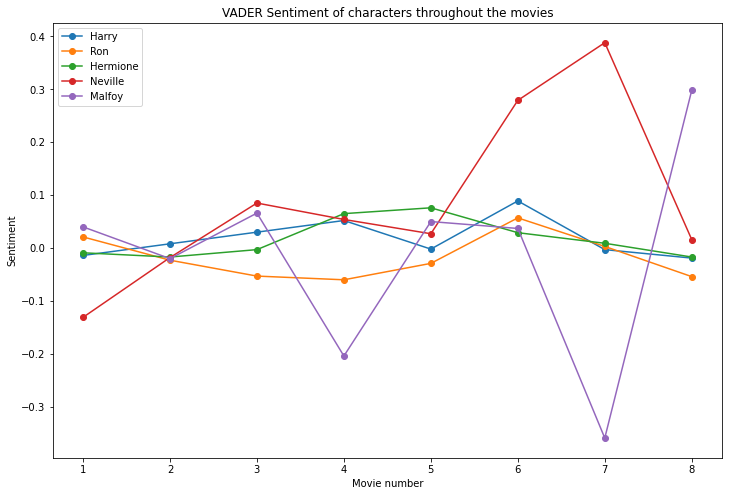

In [28]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(1,9), character_sentiment['Harry Potter'], linestyle='-', marker='o')
plt.plot(np.arange(1,9), character_sentiment['Ronald Weasley'], linestyle='-', marker='o')
plt.plot(np.arange(1,9), character_sentiment['Hermione Granger'], linestyle='-', marker='o')
plt.plot(np.arange(1,9), character_sentiment['Neville Longbottom'], linestyle='-', marker='o')
plt.plot(np.arange(1,9), character_sentiment['Draco Malfoy'], linestyle='-', marker='o')
plt.legend(['Harry', 'Ron', 'Hermione', 'Neville', 'Malfoy'])
plt.title('VADER Sentiment of characters throughout the movies')
plt.ylabel('Sentiment')
plt.xlabel('Movie number')
plt.show()

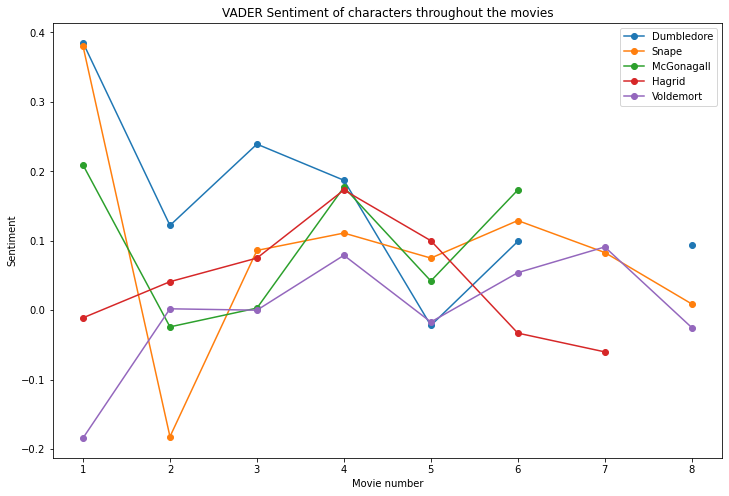

In [29]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(1,9), character_sentiment['Albus Dumbledore'], linestyle='-', marker='o')
plt.plot(np.arange(1,9), character_sentiment['Severus Snape'], linestyle='-', marker='o')
plt.plot(np.arange(1,9), character_sentiment['Minerva McGonagall'], linestyle='-', marker='o')
plt.plot(np.arange(1,9), character_sentiment['Rubeus Hagrid'], linestyle='-', marker='o')
plt.plot(np.arange(1,9), character_sentiment['Tom Riddle'], linestyle='-', marker='o')
plt.legend(['Dumbledore', 'Snape', 'McGonagall', 'Hagrid', 'Voldemort'])
plt.title('VADER Sentiment of characters throughout the movies')
plt.ylabel('Sentiment')
plt.xlabel('Movie number')
plt.show()

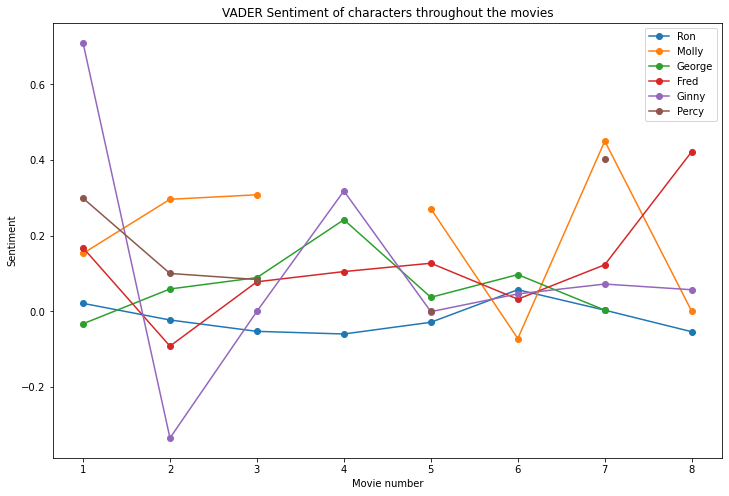

In [30]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(1,9), character_sentiment['Ronald Weasley'], linestyle='-', marker='o')
plt.plot(np.arange(1,9), character_sentiment['Molly Weasley'], linestyle='-', marker='o')
plt.plot(np.arange(1,9), character_sentiment['George Weasley'], linestyle='-', marker='o')
plt.plot(np.arange(1,9), character_sentiment['Fred Weasley'], linestyle='-', marker='o')
plt.plot(np.arange(1,9), character_sentiment['Ginevra Weasley'], linestyle='-', marker='o')
plt.plot(np.arange(1,9), character_sentiment['Percy Weasley'], linestyle='-', marker='o')
plt.legend(['Ron', 'Molly', 'George', 'Fred', 'Ginny', 'Percy'])
plt.title('VADER Sentiment of characters throughout the movies')
plt.ylabel('Sentiment')
plt.xlabel('Movie number')
plt.show()

##### part b: Overall sentiment of each movie

In [31]:
# Initialize the sentiment analyser
sia = SentimentIntensityAnalyzer()

sentiments_movies = {}

for movie in movies:
    
    movie_df = df_movies.get_group(movie)
    
    score_list=[]
    for index, row in movie_df.iterrows():
        if (type(row.clean) == str) and (row.len_clean>4) and (row.movie == movie):
            score_list.append(sia.polarity_scores(row.clean)["compound"])
    if score_list==[]:
        sentiments_movies[movie] = None
    else:
        sentiments_movies[movie] = round(np.array(score_list).mean(),3)

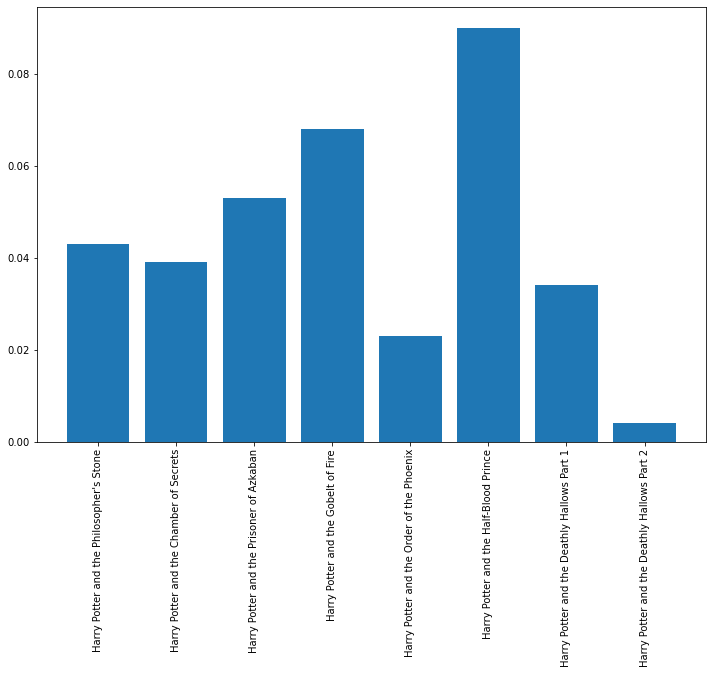

In [32]:
plt.figure(figsize=(12,8))
plt.bar(*zip(*sentiments_movies.items()))
plt.xticks(rotation=90)
plt.show()

#### part c: Sentiment by chapter

In [33]:
# init the sentiment analyzer
sia = SentimentIntensityAnalyzer()

sentiments_chapters = []

for movie in movies:
    
    movie_df = df_movies.get_group(movie)
    chapters = list(movie_df.chapter.unique())
    vader_sentiment={}
    
    for chapter in chapters:
        
        score_list=[]
        for index, row in movie_df.iterrows():
            if (type(row.clean) == str) and (row.len_clean > 4) and (row.chapter == chapter):
                score_list.append(sia.polarity_scores(row.clean)["compound"])
        if score_list==[]:
            vader_sentiment[chapter] = None
        else:
            vader_sentiment[chapter] = round(np.array(score_list).mean(),3)
    sentiments_chapters.append(vader_sentiment)

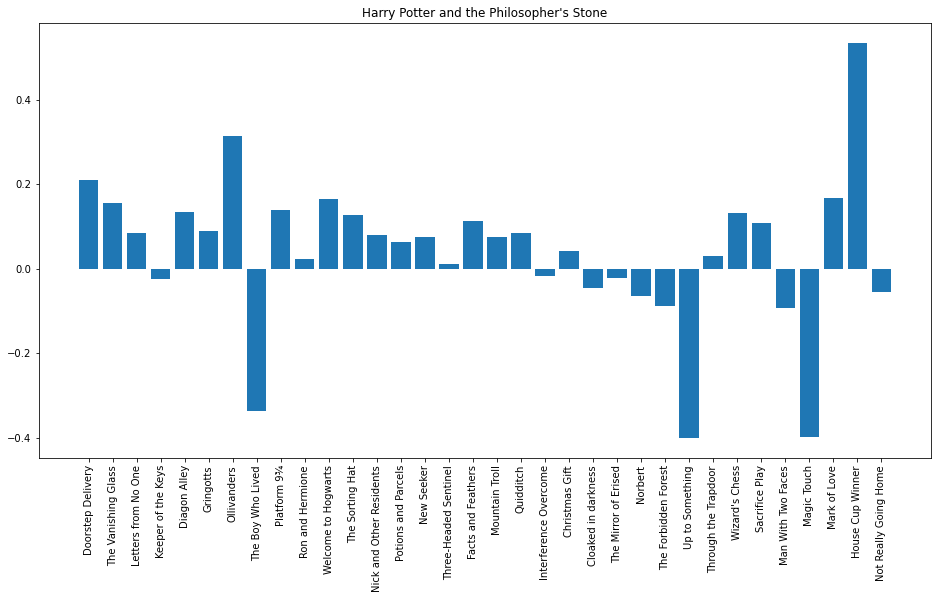

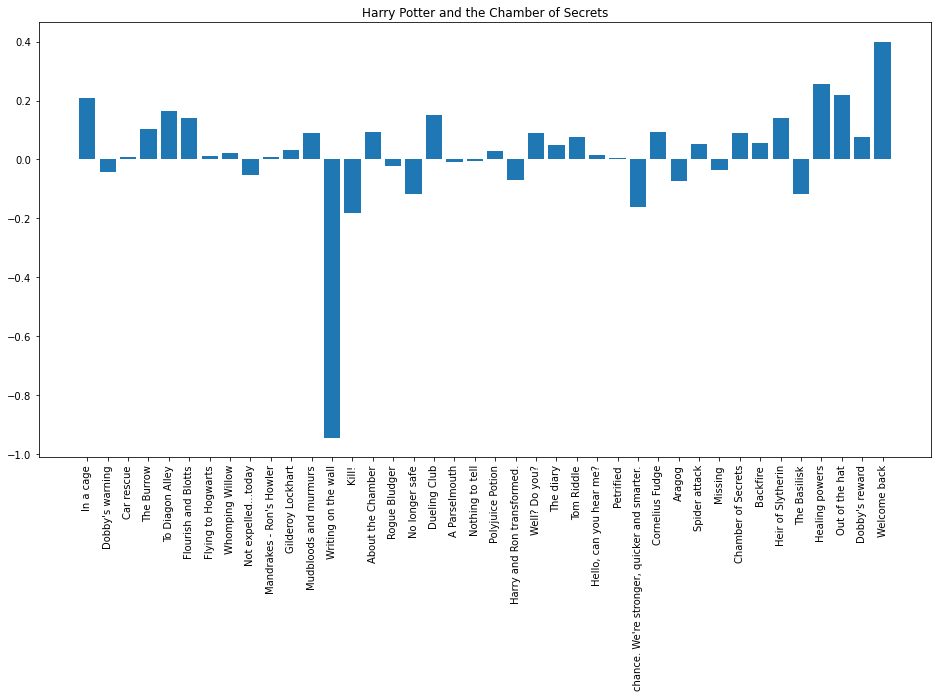

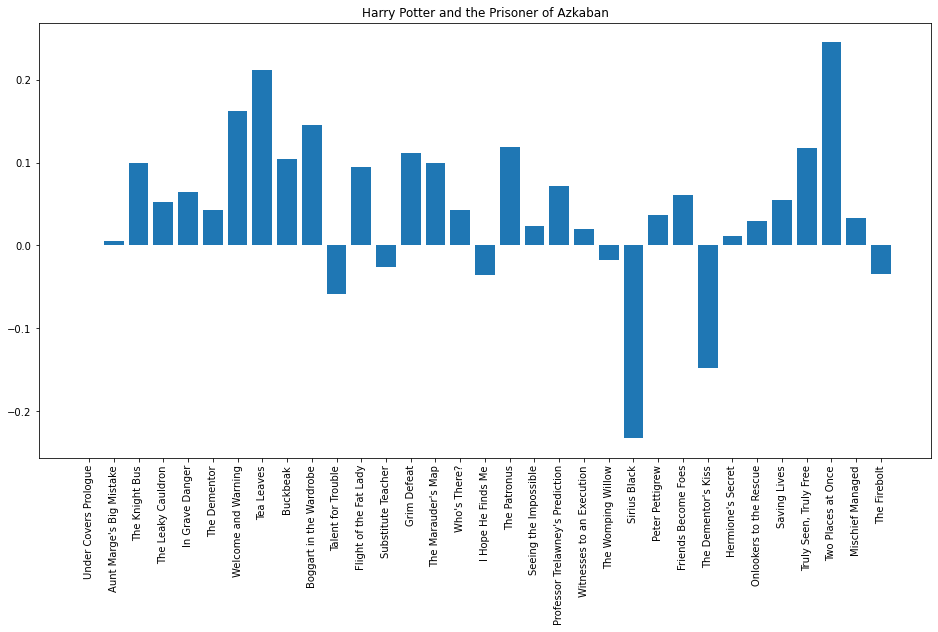

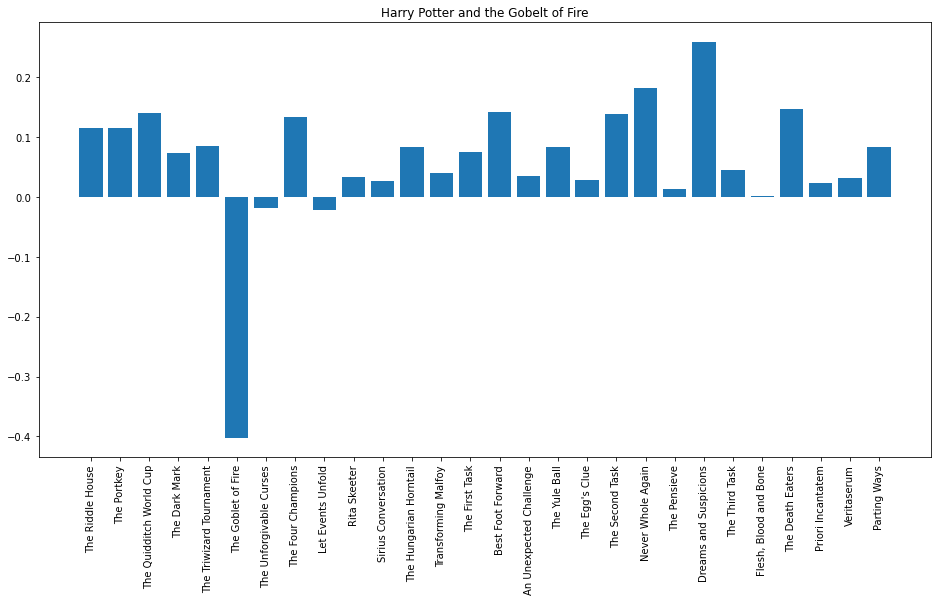

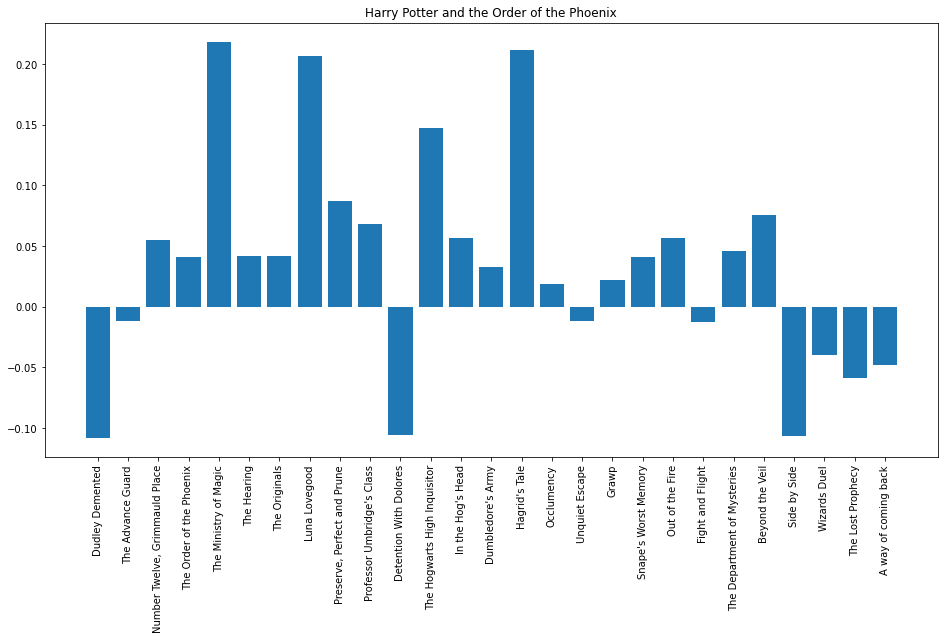

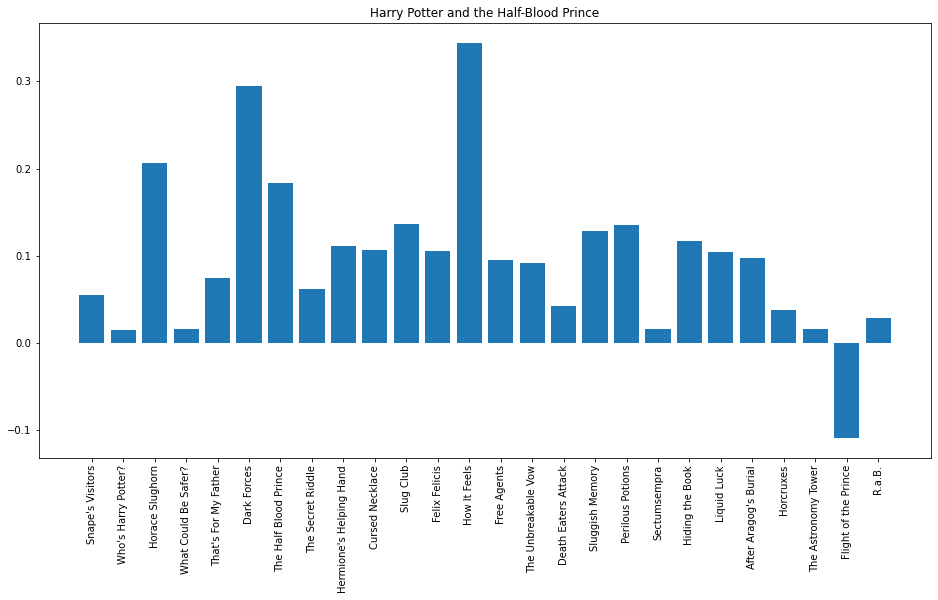

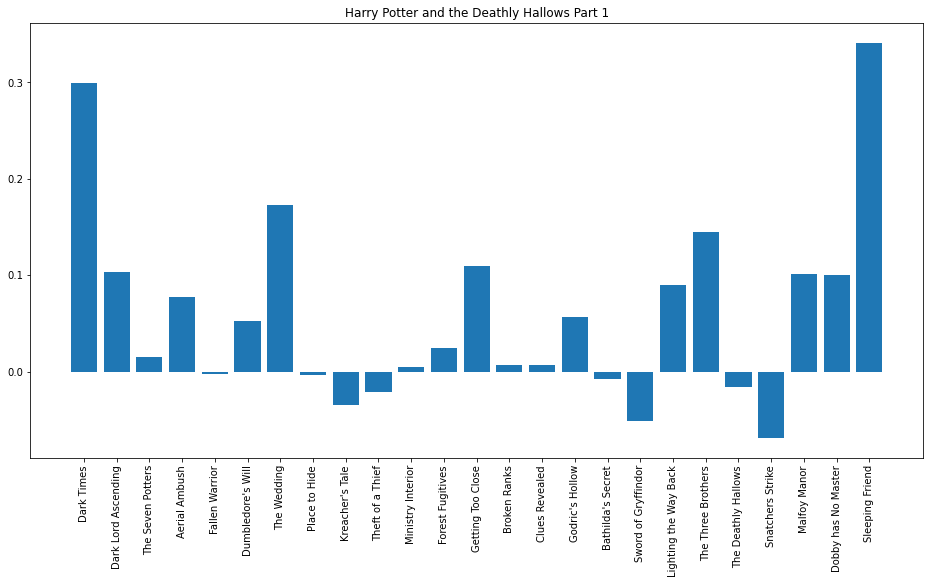

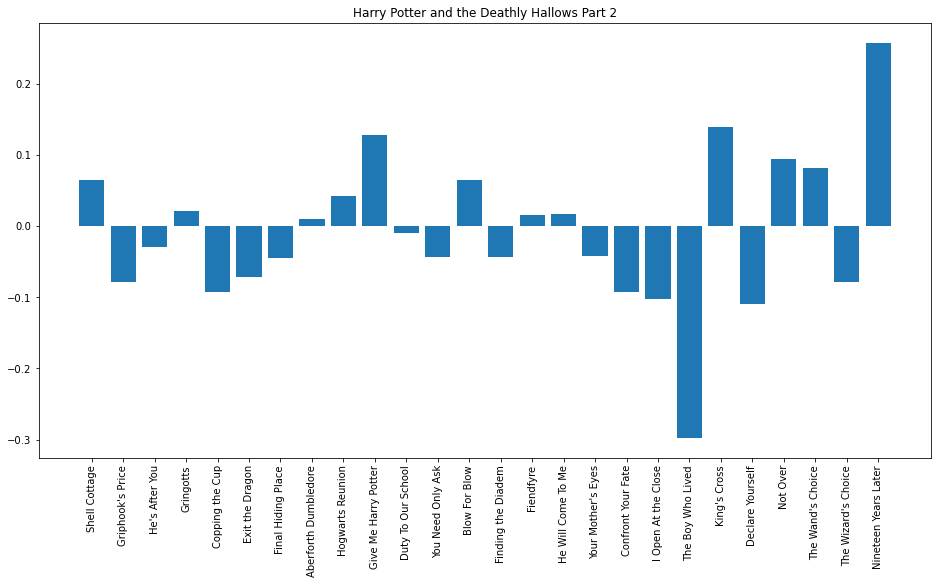

In [34]:
for i in range(len(movies)):
    plt.figure(figsize=((16,8)))
    plt.title(movies[i])
    plt.bar(*zip(*sentiments_chapters[i].items()))
    plt.xticks(rotation=90)
    plt.show()

#### part d: Sentiment analysis of houses

In [35]:
# init the sentiment analyzer
sia = SentimentIntensityAnalyzer()
houses = ['Gryffindors', 'Ravenclaws', 'Slytherins', 'Hufflepuffs']
sentiments_houses = []

for movie in movies:
    
    movie_df = df_movies.get_group(movie)
    vader_sentiment={}
    
    for house in houses:
        
        score_list=[]
        for index, row in movie_df.iterrows():
            if (type(row.clean) == str) and (row.len_clean > 4) and (row.House == house):
                score_list.append(sia.polarity_scores(row.clean)["compound"])
        if score_list==[]:
            vader_sentiment[house] = None
        else:
            vader_sentiment[house] = round(np.array(score_list).mean(),3)
    sentiments_houses.append(vader_sentiment)

In [36]:
house_sentiment = {}
for house in houses:
    sentiment = []
    for i in range(len(movies)):
        sentiment.append(sentiments_houses[i][house])
    house_sentiment[house] = sentiment

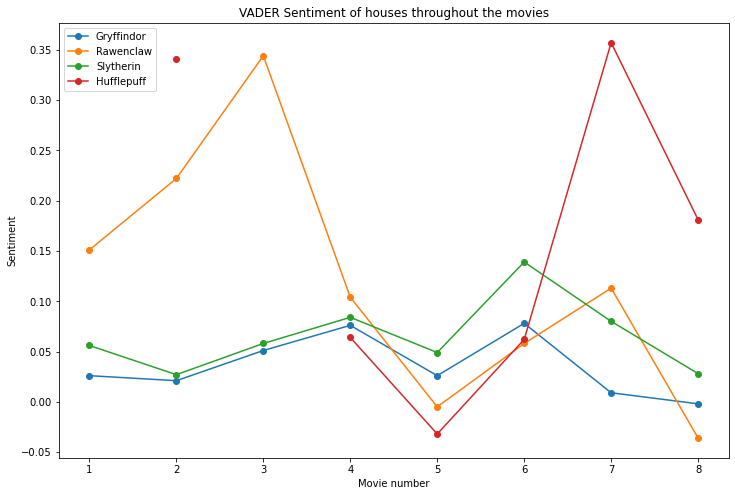

In [37]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(1,9), house_sentiment['Gryffindors'], linestyle='-', marker='o')
plt.plot(np.arange(1,9), house_sentiment['Ravenclaws'], linestyle='-', marker='o')
plt.plot(np.arange(1,9), house_sentiment['Slytherins'], linestyle='-', marker='o')
plt.plot(np.arange(1,9), house_sentiment['Hufflepuffs'], linestyle='-', marker='o')
plt.legend(['Gryffindor', 'Rawenclaw', 'Slytherin', 'Hufflepuff'])
plt.title('VADER Sentiment of houses throughout the movies')
plt.ylabel('Sentiment')
plt.xlabel('Movie number')
plt.show()

### 3.4 Project 4: ... <a class="anchor" id="s3_4"></a>

### 3.5 Project 5: ... <a class="anchor" id="s3_5"></a>

### 3.6 Project 6: ... <a class="anchor" id="s3_6"></a>

In [29]:
total_emotions=pd.read_csv('total_emotions_HP.csv')
total_emotions

movie               chapter  \
0        Harry Potter and the Philosopher's Stone     Doorstep Delivery   
1        Harry Potter and the Philosopher's Stone     Doorstep Delivery   
2        Harry Potter and the Philosopher's Stone     Doorstep Delivery   
3        Harry Potter and the Philosopher's Stone     Doorstep Delivery   
4        Harry Potter and the Philosopher's Stone     Doorstep Delivery   
...                                           ...                   ...   
1430  Harry Potter and the Deathly Hallows Part 2   The Wizard's Choice   
1431  Harry Potter and the Deathly Hallows Part 2  Nineteen Years Later   
1432  Harry Potter and the Deathly Hallows Part 2  Nineteen Years Later   
1433  Harry Potter and the Deathly Hallows Part 2  Nineteen Years Later   
1434  Harry Potter and the Deathly Hallows Part 2  Nineteen Years Later   

      scene_counting    emotion  prediction  
0                  1    neutral           3  
1                  1    sadness           1  
2                  1      worry           5  
3                  1   surprise           2  
4                  1       love           1  
...              ...        ...         ...  
1430             237    sadness           2  
1431             238    sadness           2  
1432             238  happiness           1  
1433             238      worry           1  
1434             238       love           1  

[1435 rows x 5 columns]

In [39]:
df_emotion_grouped = total_emotions.groupby('chapter')['prediction'].sum().reset_index()
df_emotion_grouped.columns = ['chapter','pred_chapter_sum']
df_emotions = pd.merge(total_emotions, df_emotion_grouped, on='chapter', how='outer')
df_emotions['prediction_percentage'] = df_emotions['prediction']/df_emotions['pred_chapter_sum']
df_emotions.sort_values(by='scene_counting',inplace=True)
df_emotions

movie               chapter  \
0        Harry Potter and the Philosopher's Stone     Doorstep Delivery   
1        Harry Potter and the Philosopher's Stone     Doorstep Delivery   
2        Harry Potter and the Philosopher's Stone     Doorstep Delivery   
3        Harry Potter and the Philosopher's Stone     Doorstep Delivery   
4        Harry Potter and the Philosopher's Stone     Doorstep Delivery   
...                                           ...                   ...   
1429  Harry Potter and the Deathly Hallows Part 2   The Wizard's Choice   
1432  Harry Potter and the Deathly Hallows Part 2  Nineteen Years Later   
1433  Harry Potter and the Deathly Hallows Part 2  Nineteen Years Later   
1431  Harry Potter and the Deathly Hallows Part 2  Nineteen Years Later   
1434  Harry Potter and the Deathly Hallows Part 2  Nineteen Years Later   

      scene_counting     emotion  prediction  pred_chapter_sum  \
0                  1     neutral           3                13   
1                  1     sadness           1                13   
2                  1       worry           5                13   
3                  1    surprise           2                13   
4                  1        love           1                13   
...              ...         ...         ...               ...   
1429             237  enthusiasm           1                 8   
1432             238   happiness           1                 5   
1433             238       worry           1                 5   
1431             238     sadness           2                 5   
1434             238        love           1                 5   

      prediction_percentage  
0                  0.230769  
1                  0.076923  
2                  0.384615  
3                  0.153846  
4                  0.076923  
...                     ...  
1429               0.125000  
1432               0.200000  
1433               0.200000  
1431               0.400000  
1434               0.200000  

[1435 rows x 7 columns]

In [51]:
df_emotions['prediction_percentage_window'] = df_emotions['prediction_percentage'].rolling(window=2).mean()
df_emotions

movie               chapter  \
0        Harry Potter and the Philosopher's Stone     Doorstep Delivery   
1        Harry Potter and the Philosopher's Stone     Doorstep Delivery   
2        Harry Potter and the Philosopher's Stone     Doorstep Delivery   
3        Harry Potter and the Philosopher's Stone     Doorstep Delivery   
4        Harry Potter and the Philosopher's Stone     Doorstep Delivery   
...                                           ...                   ...   
1429  Harry Potter and the Deathly Hallows Part 2   The Wizard's Choice   
1432  Harry Potter and the Deathly Hallows Part 2  Nineteen Years Later   
1433  Harry Potter and the Deathly Hallows Part 2  Nineteen Years Later   
1431  Harry Potter and the Deathly Hallows Part 2  Nineteen Years Later   
1434  Harry Potter and the Deathly Hallows Part 2  Nineteen Years Later   

      scene_counting     emotion  prediction  pred_chapter_sum  \
0                  1     neutral           3                13   
1                  1     sadness           1                13   
2                  1       worry           5                13   
3                  1    surprise           2                13   
4                  1        love           1                13   
...              ...         ...         ...               ...   
1429             237  enthusiasm           1                 8   
1432             238   happiness           1                 5   
1433             238       worry           1                 5   
1431             238     sadness           2                 5   
1434             238        love           1                 5   

      prediction_percentage  prediction_percentage_window  
0                  0.230769                           NaN  
1                  0.076923                      0.153846  
2                  0.384615                      0.230769  
3                  0.153846                      0.269231  
4                  0.076923                      0.115385  
...                     ...                           ...  
1429               0.125000                      0.187500  
1432               0.200000                      0.162500  
1433               0.200000                      0.200000  
1431               0.400000                      0.300000  
1434               0.200000                      0.300000  

[1435 rows x 8 columns]

In [59]:
emotion_list = df_emotions['emotion'].unique()
to_concatenate = []
for emotion in emotion_list:
    s_df = df_emotions[df_emotions['emotion']==emotion]
    s_df2 = s_df.copy()
    s_df2 = s_df2.sort_values(by='scene_counting',inplace=False,axis=0)
    pred_smooth_list = s_df2['prediction_percentage'].rolling(window=3).mean().values
    pred_smooth_list[0] = s_df2['prediction_percentage'].values[0]
    pred_smooth_list[1] = s_df2['prediction_percentage'].values[1]
    s_df2['pred_smooth'] = pred_smooth_list
    to_concatenate.append(s_df2)
df_emotions_smooth = pd.concat(to_concatenate)
df_emotions_smooth.sort_values(by='scene_counting',inplace=True,axis=0)
df_emotions_smooth

movie               chapter  \
0        Harry Potter and the Philosopher's Stone     Doorstep Delivery   
5        Harry Potter and the Philosopher's Stone     Doorstep Delivery   
4        Harry Potter and the Philosopher's Stone     Doorstep Delivery   
3        Harry Potter and the Philosopher's Stone     Doorstep Delivery   
2        Harry Potter and the Philosopher's Stone     Doorstep Delivery   
...                                           ...                   ...   
1427  Harry Potter and the Deathly Hallows Part 2   The Wizard's Choice   
1434  Harry Potter and the Deathly Hallows Part 2  Nineteen Years Later   
1432  Harry Potter and the Deathly Hallows Part 2  Nineteen Years Later   
1431  Harry Potter and the Deathly Hallows Part 2  Nineteen Years Later   
1433  Harry Potter and the Deathly Hallows Part 2  Nineteen Years Later   

      scene_counting    emotion  prediction  pred_chapter_sum  \
0                  1    neutral           3                13   
5                  1  happiness           1                13   
4                  1       love           1                13   
3                  1   surprise           2                13   
2                  1      worry           5                13   
...              ...        ...         ...               ...   
1427             237      worry           3                 8   
1434             238       love           1                 5   
1432             238  happiness           1                 5   
1431             238    sadness           2                 5   
1433             238      worry           1                 5   

      prediction_percentage  prediction_percentage_window  pred_smooth  
0                  0.230769                           NaN     0.230769  
5                  0.076923                      0.076923     0.076923  
4                  0.076923                      0.115385     0.076923  
3                  0.153846                      0.269231     0.153846  
2                  0.384615                      0.230769     0.384615  
...                     ...                           ...          ...  
1427               0.375000                      0.312500     0.258333  
1434               0.200000                      0.300000     0.166667  
1432               0.200000                      0.162500     0.166667  
1431               0.400000                      0.300000     0.283333  
1433               0.200000                      0.200000     0.258333  

[1435 rows x 9 columns]

In [3]:
table = total_emotions.pivot_table(index=['movie','chapter','scene_counting'],columns='emotion',values='prediction',aggfunc='sum',fill_value=0)
table=round(table.div(table.sum(axis=1), axis=0)*100,1).reset_index()
# table.sort_values(by='scene_counting',inplace=True)
table.sort_values(by='scene_counting',inplace=True)
table.head()

emotion                                     movie              chapter  \
175      Harry Potter and the Philosopher's Stone    Doorstep Delivery   
200      Harry Potter and the Philosopher's Stone  The Vanishing Glass   
181      Harry Potter and the Philosopher's Stone  Letters from No One   
180      Harry Potter and the Philosopher's Stone   Keeper of the Keys   
174      Harry Potter and the Philosopher's Stone         Diagon Alley   

emotion  scene_counting  empty  enthusiasm   fun  happiness  hate  love  \
175                   1    0.0         0.0   0.0        7.7   0.0   7.7   
200                   2    0.0         0.0   5.3       10.5   0.0  21.1   
181                   3    0.0         0.0  11.8        0.0   5.9   5.9   
180                   4    0.0         0.0   0.0       13.6   9.1   9.1   
174                   5    0.0         0.0   0.0       10.5   0.0   0.0   

emotion  neutral  relief  sadness  surprise  worry  
175         23.1     0.0      7.7      15.4   38.5  
200         21.1    10.5     10.5       0.0   21.1  
181         17.6     5.9      5.9      11.8   35.3  
180         27.3     4.5      9.1      13.6   13.6  
174         52.6     5.3      0.0      15.8   15.8

In [85]:
df_order_movies=df_emotions_smooth.groupby('movie').max('scene_counting').scene_counting.reset_index().sort_values(by='scene_counting')
df_order_movies

movie  scene_counting
6     Harry Potter and the Philosopher's Stone              34
0      Harry Potter and the Chamber of Secrets              74
7     Harry Potter and the Prisoner of Azkaban             106
3          Harry Potter and the Gobelt of Fire             134
5    Harry Potter and the Order of the Phoenix             161
4       Harry Potter and the Half-Blood Prince             187
1  Harry Potter and the Deathly Hallows Part 1             212
2  Harry Potter and the Deathly Hallows Part 2             238

In [108]:
l = df_order_movies['scene_counting'].values
l_x0 = np.concatenate(([1],l[:-1]))
l_x1 = l
print(l_x0)
print(l_x1)


[  1  34  74 106 134 161 187 212]
[ 34  74 106 134 161 187 212 238]


In [167]:
import plotly.express as px
import chart_studio
import chart_studio.plotly as py
import plotly.offline as pyo
import plotly.graph_objects as go
import plotly.express as px
from plotly.graph_objs.scatter.marker import Line
pyo.init_notebook_mode()
chart_studio.tools.set_credentials_file(username='mmestre', api_key='YbVYpQRqmw3RvNPohYBn')

fig = px.line(df_emotions_smooth, x="scene_counting", y="pred_smooth", color='emotion')
list_colors = ['#9FE3FE','#DF9BFD','#FD9DCB','#FFB3A6','#FECF9F','#F7FCA8','#D3FFA5','#B2FEDB']
l = df_order_movies['scene_counting'].values
l = np.concatenate(([0],l[:-1]))
for scene in range(len(df_order_movies)):
    fig.add_vrect(x0=l_x0[scene],x1=l_x1[scene],annotation_text='HP{}'.format(scene+1),annotation=dict(font_size=14),
              fillcolor=list_colors[scene], opacity=0.2, line_width=1.5,annotation_position="top", line_color = 'gray')


'https://plotly.com/~mmestre/96/'

In [146]:
import chart_studio
import chart_studio.plotly as py
import plotly.offline as pyo
import plotly.graph_objects as go
import plotly.express as px
from plotly.graph_objs.scatter.marker import Line

In [168]:
fig = go.Figure()

c=0
l_emotion = ['legendonly',True,'legendonly','legendonly','legendonly',
             True,'legendonly','legendonly','legendonly','legendonly','legendonly',]
for emotion in df_emotions_smooth['emotion'].unique():
    fig.add_trace(
    go.Line(x = df_emotions_smooth[df_emotions_smooth['emotion']==emotion]['scene_counting'],
            y = df_emotions_smooth[df_emotions_smooth['emotion']==emotion]['pred_smooth'],
            name = emotion,visible=l_emotion[c]))
    c+=1

list_colors = ['#9FE3FE','#DF9BFD','#FD9DCB','#FFB3A6','#FECF9F','#F7FCA8','#D3FFA5','#B2FEDB']
l = df_order_movies['scene_counting'].values
l = np.concatenate(([0],l[:-1]))
for scene in range(len(df_order_movies)):
    fig.add_vrect(x0=l_x0[scene],x1=l_x1[scene],annotation_text='HP{}'.format(scene+1),annotation=dict(font_size=14),
              fillcolor=list_colors[scene], opacity=0.2, line_width=1.5,annotation_position="top", line_color = 'gray')
    
fig.show()
fig.show()
#py.plot(fig, filename='emotion_films_Harry_Potter_overview')

'https://plotly.com/~mmestre/96/'

## 4. Discussion <a class="anchor" id="c4"></a>

## 5. Contributions <a class="anchor" id="c5"></a>

During this project...

* Jakob (s184419) has focused on ...  

* Marc (s210152) has focused on ...

* Paul (s205569) has focused on ...

However, it is worth noting the great collaboration throughout the course, both in the assignments and in the final project, so that each of us has been aware of and contributed to the project...

## 6. References <a class="anchor" id="c6"></a>

* The main ...